# 🏦 **BANK MARKETING CAMPAIGN**

**Table of Content :**

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Exploratory Data Analysis (EDA)
5. Feature Engineering
6. Modeling Experiment
7. Simulation
8. Conclusion and Recommendation

## **Business Understanding**

### **Context:**
Bank perlu menjaga rasio likuiditasnya untuk memastikan kebutuhan kas terus terpenuhi. Rasio ini menunjukkan kemampuan bank untuk mengatasi kewajiban keuangan jangka pendek, yang mencakup memberikan pinjaman kepada konsumen dan bisnis. Semakin banyak cadangan kas yang dimiliki bank, semakin besar kemampuannya untuk memberikan pinjaman dan menghasilkan keuntungan.

Salah satu cara untuk menjaga rasio ini adalah dengan menawarkan investasi deposito berjangka kepada pelanggan. **Deposito berjangka adalah jenis investasi di mana pelanggan berkomitmen untuk menyetorkan sejumlah uang ke bank atau lembaga keuangan yang tidak dapat ditarik selama jangka waktu tertentu**. Sebagai imbalannya, pelanggan menerima tingkat bunga tetap atas jumlah yang mereka setorkan.

Bank-bank di Portugal melakukan kampanye pemasaran melalui telepon untuk mempromosikan investasi deposito berjangka, menghubungi pelanggan yang diyakini sebagai calon investor potensial. Untuk meningkatkan efektivitas kampanye-kampanye ini, bank-bank bertujuan untuk memprediksi pelanggan mana yang kemungkinan besar akan membuka deposito berjangka. Prediksi yang akurat memungkinkan bank untuk fokus pada pelanggan yang menjanjikan, sehingga mengurangi kerugian keuangan akibat upaya kampanye yang tidak tepat sasaran.

### **Problem Statement:**
Divisi Marketing memainkan peran penting dalam memastikan dana yang dibutuhkan untuk operasi sehari-hari bank dan strategi keuangan yang lebih besar terpenuhi. Salah satu cara yang mereka lakukan adalah melalui deposito berjangka. Ini merupakan sumber dana yang dapat diandalkan, menawarkan risiko rendah dan hasil yang stabil. Namun, terdapat tantangan yaitu deposito berjangka membutuhkan komitmen jangka panjang dan menawarkan pengembalian tetap, yang membuatnya kurang menarik di pasar di mana banyak orang menginginkan investasi dengan pengembalian yang lebih tinggi.

Untuk mengatasi ini, divisi menggunakan kampanye pemasaran telemarketing yang ditargetkan, melibatkan panggilan berulang untuk menilai minat pelanggan. Namun metode ini dapat memakan waktu dan mahal jika tidak dilakukan secara efektif. Jika divisi hanya mengandalkan metode manual untuk mengidentifikasi pelanggan potensial, hal itu bisa mengakibatkan prediksi yang bias dan tidak akurat. Ini berarti mereka bisa saja mengincar orang yang salah, membuang-buang waktu dan uang.

Untuk meningkatkan efektivitas upaya pemasaran mereka, diperlukan pendekatan yang lebih strategis. Dengan menggunakan model klasifikasi yang tepat, divisi dapat fokus pada pelanggan yang lebih mungkin membuka deposito berjangka. Dengan cara ini, mereka dapat menjalankan kampanye yang lebih efisien dan lebih baik memanfaatkan sumber daya mereka.

Dengan menggunakan model klasifikasi yang tidak hanya memprioritaskan prediksi yang akurat tetapi juga memperhitungkan profitabilitas, Divisi Marketing dapat mengincar secara strategis pelanggan yang lebih mungkin membuka deposito berjangka. Pendekatan ini memungkinkan divisi ini untuk mengoptimalkan kampanye dan alokasi sumber daya, yang pada akhirnya meningkatkan profitabilitas mereka.

**`Key Questions:`**
- Faktor atau variabel mana yang sebaiknya difokuskan oleh Divisi Marketing untuk meningkatkan pendaftaran deposito berjangka?
- Bagaimana Divisi Marketing dapat memperkirakan kemungkinan pelanggan untuk berkomitmen pada deposito berjangka?

### **Goals:**

Tujuan utama adalah **membuat model klasifikasi yang efektif**. Model ini diharapkan dapat memprediksi seberapa mungkin klien akan memilih deposito berjangka. Model ini akan memprediksi baik klien yang akan mengatakan setuju maupun mereka yang akan mengatakan tidak untuk deposito berjangka.

Selain itu, kita ingin **mengetahui apa yang membuat pelanggan memutuskan untuk mendaftar deposito berjangka**. Mengetahui faktor-faktor tersebut akan membantu bank menggunakan sumber daya mereka lebih baik, membuat interaksi mereka dengan klien lebih efektif, dan pada akhirnya, mendapatkan lebih banyak klien setuju untuk deposito berjangka melalui pemasaran mereka.


### **Analytical Approach:**
Kita akan menganalisis karakteristik calon pelanggan yang kemungkinan besar akan membuka rekening deposito berjangka, lalu membangun model supervised machine learning, khususnya model klasifikasi, untuk memprediksi yang cenderung membuka rekening deposito berjangka. Dengan cara ini, calon pelanggan ini dapat diprioritaskan dalam kampanye, sehingga membuat prosesnya lebih efisien.

### **Metric Evaluation:**

Analisis ini akan berfokus pada pelanggan yang tertarik untuk berinvestasi dalam deposito berjangka. Target-targetnya didefinisikan sebagai berikut:

- **0:** menandakan pelanggan yang tidak berinvestasi dalam deposito berjangka.
- **1:** menandakan pelanggan yang berinvestasi dalam deposito berjangka.


Memastikan akurasi model kita sangat penting untuk menghindari dampak keuangan dari kesalahan klasifikasi, yang bisa berupa positif palsu atau negatif palsu.

| **Tipe Error**     |**Penjelasan** | **Konsekuensi** | 
|-----------------|------------|----------------|
| **False Positive / Type 1 Error**  |Ini terjadi ketika model secara tidak benar memprediksi bahwa seorang pelanggan akan berinvestasi dalam deposito berjangka padahal sebenarnya tidak. Dengan kata lain, prediksi model positif (1), tetapi nilai sebenarnya negatif (0)| Bank akan mengeluarkan biaya pemasaran yang tidak perlu dengan menargetkan pelanggan yang tidak tertarik untuk berinvestasi dalam deposito berjangka.|
| **False Negative / Type 2 Error**  |Ini terjadi ketika model secara tidak benar memprediksi bahwa seorang pelanggan tidak akan berinvestasi dalam deposito berjangka padahal sebenarnya akan melakukannya. Di sini, prediksi model negatif (0), tetapi nilai sebenarnya positif (1)| Bank akan melewatkan potensi keuntungan dari pelanggan yang kemungkinan besar akan berinvestasi dalam deposito berjangka.| 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import missingno as msn
import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import datasets
df1 = pd.read_csv('data_bank_marketing_campaign.csv', delimiter=',')
df2 = pd.read_csv('bank additional.csv', delimiter=',')

In [3]:
df1

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no


In [4]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
# dropping duplicates in df1 (initial dataset) before merging
df1 = df1.drop_duplicates(keep='first', ignore_index=True)

# merging 
df = pd.merge(df1, df2, on=df1.columns.tolist(), how='left')

# saving to csv
df.to_csv('new_data.csv', index=False)

# checking shape
df.shape

# display dataframe
display(df.head(), df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,married,secondary,no,4,94,0
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,married,tertiary,no,17,882,0
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,married,secondary,no,7,476,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,single,primary,no,13,531,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,married,secondary,no,18,176,0


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
7813,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes,married,secondary,no,3,322,0
7814,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes,married,tertiary,no,24,127,2
7815,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no,married,secondary,no,8,14,0
7816,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no,married,secondary,no,21,226,0
7817,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes,married,primary,no,6,728,0


# **Data Understanding**

Dataset [Bank Marketing Campaign](https://drive.google.com/drive/folders/13lrEDlKfnTPNREfGLBaYGYf8dSjHBzfW) terkait dengan kampanye pemasaran langsung (telepon) sebuah lembaga perbankan di Portugal. Dataset ini diadaptasi dari [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/222/bank+marketing) dan diambil pada tahun 2014. 

Dataset Bank Marketing Campaign terdiri dari 7.813 baris dan 17 kolom. Ini mencakup informasi tentang profil pelanggan serta data terkait keuangan pelanggan dan upaya pemasaran bank.

### **Features**
#### **Customer profile**
| Variabel      | Penjelasan | 
|------------|-----------|
| age  | Variabel numerik yang mewakili usia klien, berkisar dari 18 hingga 95 tahun.    | 
|job| Kategorisasi pekerjaan klien|

Elemen data berikut mendukung prediksi apakah seorang pelanggan akan berinvestasi dalam deposito berjangka atau tidak:

- `age` : 

    Usia memainkan peran penting dalam keputusan investasi. Sementara itu, deposito berjangka adalah produk investasi yang agak tersegmentasi, sehingga usia dapat menjadi prediktor yang berpengaruh. Orang-orang di usia produktif cenderung memilih produk investasi dengan tingkat pengembalian yang lebih tinggi, meskipun membawa risiko lebih besar, karena lebih memilih likuiditas yang lebih tinggi. Pelanggan yang lebih tua umumnya diasumsikan lebih suka investasi dengan risiko rendah dan tingkat bunga tetap, seperti yang ditunjukkan oleh penelitian tentang perilaku investasi di berbagai kelompok usia.

- `job` :  

    Pekerjaan seseorang dapat berfungsi sebagai prediktor karena berbagai jenis pekerjaan, seperti yang memiliki pendapatan tetap versus variabel, menunjukkan perilaku keuangan yang berbeda. Studi telah menunjukkan bahwa keamanan pekerjaan dan stabilitas pendapatan dapat mempengaruhi keputusan investasi 

Profil demografis seperti gender, usia, pendidikan, pekerjaan, pendapatan, tabungan, dan ukuran keluarga juga memengaruhi keputusan investasi. Data usia dan pekerjaan tidak cukup representatif untuk mewakili data demografis yang beragam ini. Karena data demografis dapat menjadi fitur penting dalam klasifikasi, perlu ditambahkan untuk mengatasi masalah ini dengan lebih baik. Terutama untuk data demografis yang terkait dengan pengeluaran dan pendapatan seperti ukuran keluarga, status pernikahan, dan pendidikan

#### **Customer financial**
| Variabel      | Penjelasan | 
|------------|-----------|
| balance| Variabel numerik yang mewakili jumlah saldo tahunan rata-rata klien   |
|housing| Nilai biner yang menunjukkan apakah klien memiliki pinjaman rumah atau tidak   |
|loan| Nilai biner yang menunjukkan keberadaan atau ketiadaan pinjaman pribadi klien |

- `balance`: 

    Saldo tahunan rata-rata dapat menjadi prediktor karena diasumsikan bahwa individu yang berinvestasi memiliki saldo stabil sepanjang tahun. Asumsi ini didasarkan pada teori bahwa stabilitas keuangan memfasilitasi kemampuan untuk berinvestasi jangka panjang.

- `housing` & `loan` : 

    Keberadaan pinjaman dapat memengaruhi perilaku investasi. Orang-orang dengan pinjaman biasanya kurang tertarik untuk terlibat dalam investasi jangka panjang, terutama yang kurang likuid. Hal ini didukung oleh studi yang menghubungkan kewajiban utang dengan aktivitas investasi yang berkurang  

Manajemen keuangan individu erat kaitannya dengan keputusan investasi. Jika data di atas menyatakan tentang pinjaman yang dimiliki, maka juga perlu mencari hal-hal yang terkait dengan kemampuan untuk memenuhi kewajiban pembayaran utang karena ini dapat mempengaruhi keputusan investasi.

#### **Marketing data** 
| Variabel      | Penjelasan | 
|------------|-----------|
|contact  | Jenis komunikasi kontak| 
|month| Bulan terakhir kontak dalam setahun|
|campaign|Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini|
|pdays| Jumlah hari setelah klien dihubungi dari kampanye sebelumnya |
|poutcome| Hasil kampanye pemasaran sebelumnya|
|deposit| Apakah pelanggan melakukan deposit atau tidak|

Data tentang kampanye yang telah dilakukan dan hasil kampanye diperlukan untuk mengetahui aspek kampanye mana yang memiliki efek signifikan dalam meningkatkan jumlah pelanggan yang berinvestasi dalam deposito berjangka.

Karena telemarketing adalah pemasaran yang dipersonalisasi di mana pemasar diharapkan untuk menjalin hubungan baik dengan klien, perlu untuk menambahkan indikator yang terkait dengan hal ini. Misalnya, kapan terakhir kali pemasar berkomunikasi dengan pelanggan, berapa lama durasi komunikasi dan lain-lain. Indikator-indikator ini dapat menjadi prediktor kesuksesan kampanye dan dapat digunakan untuk memperkirakan apakah seorang pelanggan ingin berinvestasi dalam deposito berjangka atau tidak.

#### **Adding New Data**

Untuk memenuhi kebutuhan data dalam melakukan klasifikasi, data tambahan ditambahkan dari dataset asli, karena dalam dataset asli terdapat informasi tambahan yang diperlukan seperti status pernikahan, pendidikan, dll. Penambahan dilakukan dengan cara menggabungkan dan memastikan bahwa baris yang ditambahkan memang merupakan baris yang sama dengan yang ada dalam dataset. Berikut adalah hasil akhir dari penambahan data

| Variabel      | Penjelasan | 
|------------|-----------|
| age  | Variabel numerik yang mewakili usia klien, berkisar dari 18 hingga 95 tahun    | 
|job| Kategorisasi pekerjaan klien|
| balance| Variabel numerik yang mewakili jumlah saldo tahunan rata-rata klien   |
|housing| Nilai biner yang menunjukkan apakah klien memiliki pinjaman rumah atau tidak   |
|loan| Nilai biner yang menunjukkan keberadaan atau ketiadaan pinjaman pribadi klien |
|contact  | Jenis komunikasi kontak | 
|month| Bulan terakhir kontak dalam setahun|
|campaign|Jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini |
|pdays| Jumlah hari setelah klien dihubungi dari kampanye sebelumnya |
|poutcome| Hasil kampanye pemasaran sebelumnya|
|deposit| Apakah pelanggan melakukan deposit atau tidak|
| marital* | Status pernikahan |
| education* | Tingkat pendidikan | 
| default* | Apakah memiliki kredit bermasalah? |
| day* | Hari terakhir kontak |
| duration* | Durasi kontak terakhir, dalam detik |
| previous* | Jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini |

Dengan menggunakan data lengkap ini, dataset dinyatakan siap digunakan untuk menjawab permasalahan.

**Note :** Kolom yang ditambahkan ditandai dengan tanda bintang (*)

#### **Data Types**

Sebelum melakukan proses lainnya, penting untuk memahami jenis data yang terkait dengan setiap kolom. Berikut adalah tabel yang menggambarkan jenis data beserta kolom-kolom yang sesuai:

| Tipe       | Kategori  | Kolom                                                                                         |
|------------|-----------|------------------------------------------------------------------------------------------------|
| Numerical  | Discrete  | age, campaign, pdays, day, previous |
|            | Continuous| balance, duration                                                                        |
| Categorical| Ordinal   | poutcome, month, education                                                                                    |
|            | Nominal   | job, contact, marital|
|            | Nominal(Binary) | housing, loan, default, deposit|

In [6]:
numerical_columns = ['age', 'balance', 'campaign', 'pdays', 'duration', 'previous', 'day']
categorical_columns = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'marital', 'education', 'default']
target = ['deposit']

## **Data Preparation**

#### **1. Checking Data Type, Missing Value, and Duplicate**

In [7]:
# checking the data
print(f'Jumlah baris dan kolom pada dataset: {df.shape}')

pd.DataFrame({
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value(%)': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    '0_value': [True if df[col].dtype == int and (df[col] == 0).any() else False for col in df.columns],
    'duplicate' : df.duplicated().sum()})

Jumlah baris dan kolom pada dataset: (7818, 17)


,feature,data_type,null_value(%),n_unique,0_value,duplicate
0,age,int64,0.0,75,False,0
1,job,object,0.0,12,False,0
2,balance,int64,0.0,3153,False,0
3,housing,object,0.0,2,False,0
4,loan,object,0.0,2,False,0
5,contact,object,0.0,3,False,0
6,month,object,0.0,12,False,0
7,campaign,int64,0.0,32,False,0
8,pdays,int64,0.0,422,False,0
9,poutcome,object,0.0,4,False,0


<AxesSubplot: >

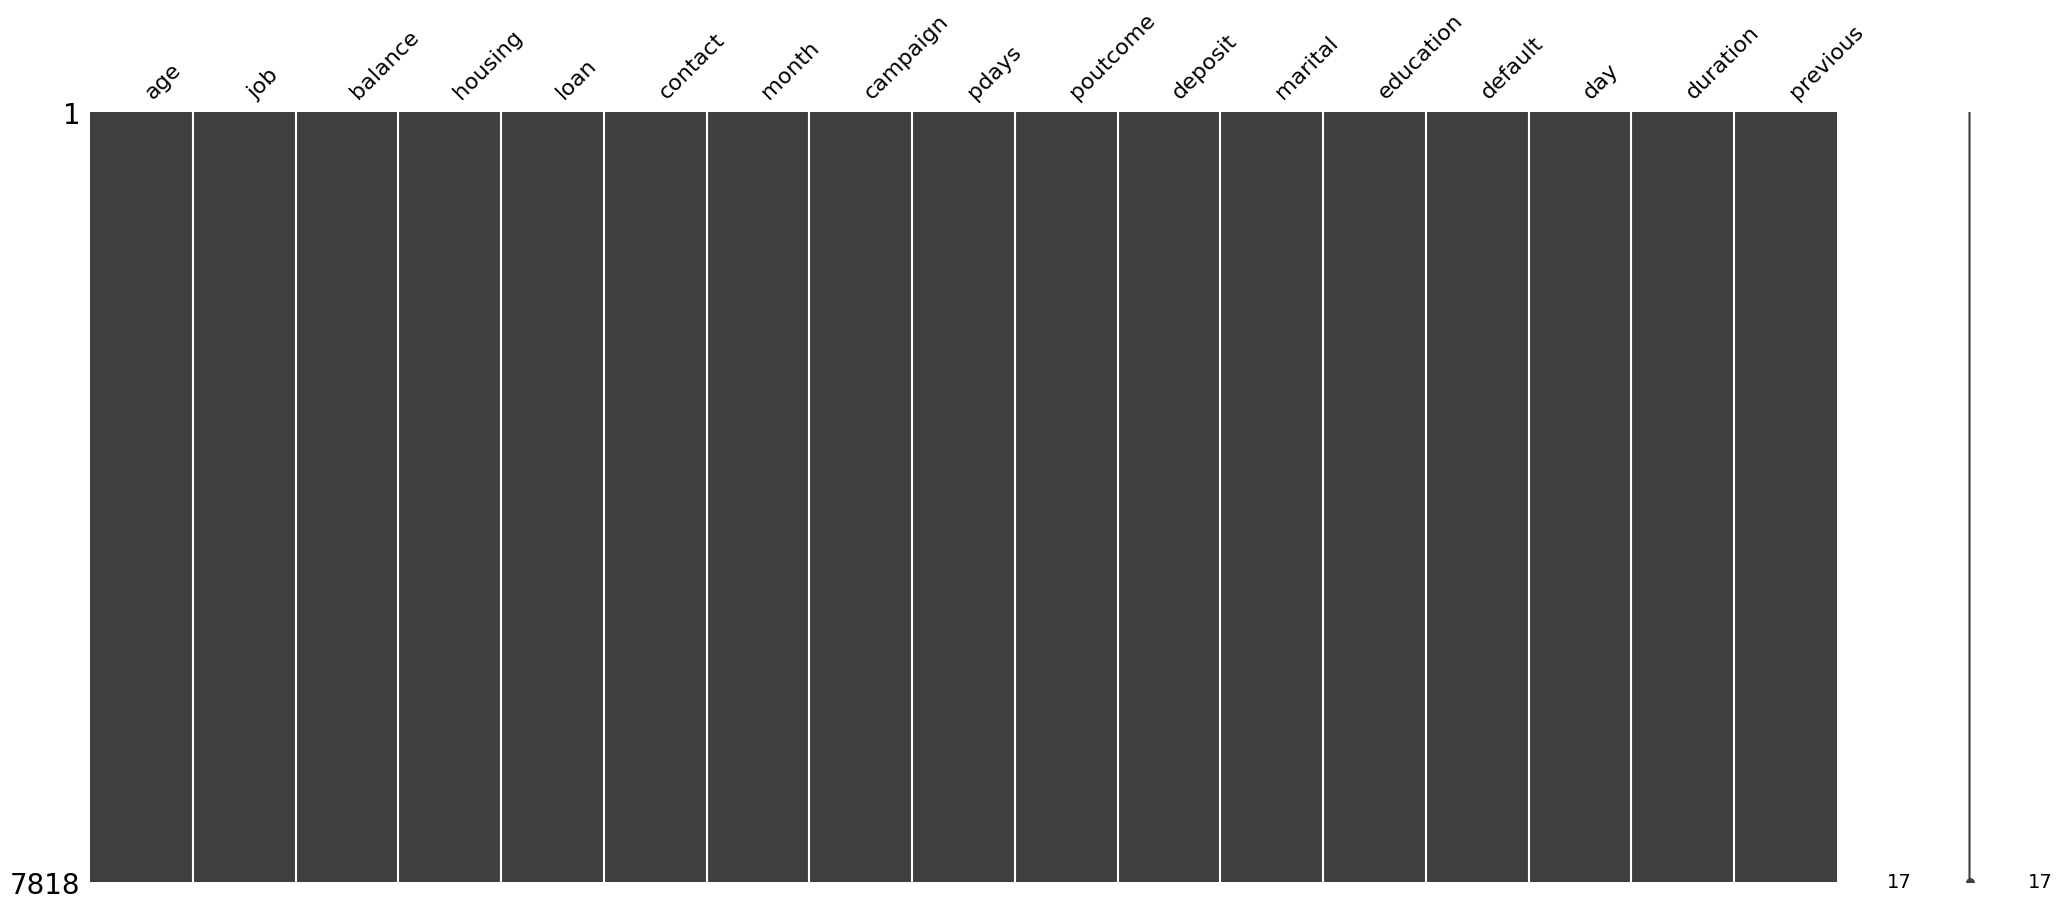

In [8]:
msn.matrix(df)

**Insight:**

- Jenis data di setiap kolom sudah sesuai.
- Tidak ditemukan missing value
- Tidak ditemukan data duplikat karena data duplikat sudah ditangani selama proses penggabungan dengan data baru.

In [9]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns : 
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns = ['Column Name', 'Number of Unique', 'Unique Sample'], 
                         data=listItem)
tableDesc

,Column Name,Number of Unique,Unique Sample
0,age,75,"[55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25, 29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50, 79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72, 22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83, 78, 74, 18, 85, 95, 86, 90]"
1,job,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
2,balance,3153,"[1662, -3058, 3025, -87, 205, -76, 4803, 911, 805, 0, 1234, 1107, 1170, 341, 4808, 88, 169, 863, 242, 2597, 4929, 277, 1438, 15, 3733, 204, 1684, 1025, 55, 19, 348, 785, 742, 511, 6651, 1612, 555, 54, 1185, 110, 950, 412, 228, 367, 3993, 2599, 3528, 32, 551, 3161, 533, 8725, 349, 514, 2688, -194, 154, 874, 2, 5953, 1269, -327, 235, 7, 2661, 1948, 20, 502, 193, 13658, 1716, 172, 1667, 157, 8, 951, 427, 241, 469, 2060, 7177, 655, -114, 588, -971, 4570, 250, 131, 93, 22, 15341, 356, 190, -124, 2228, -60, 376, 1567, 855, 4151, ...]"
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,contact,3,"[cellular, telephone, unknown]"
6,month,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
7,campaign,32,"[2, 3, 1, 4, 5, 6, 7, 30, 8, 9, 11, 14, 10, 28, 63, 12, 24, 17, 15, 18, 19, 13, 21, 23, 22, 33, 16, 25, 26, 20, 29, 43]"
8,pdays,422,"[-1, 352, 21, 91, 186, 263, 96, 355, 294, 412, 89, 114, 276, 93, 175, 57, 323, 156, 86, 95, 271, 182, 289, 334, 269, 309, 144, 183, 417, 138, 254, 337, 171, 389, 87, 170, 165, 372, 247, 98, 196, 469, 272, 104, 63, 587, 336, 145, 130, 28, 202, 324, 147, 94, 328, 420, 179, 90, 81, 160, 298, 356, 357, 267, 430, 52, 181, 365, 237, 330, 103, 374, 75, 133, 321, 204, 782, 266, 197, 270, 318, 349, 187, 359, 490, 192, 227, 100, 168, 177, 251, 301, 350, 92, 184, 345, 290, 199, 333, 169, ...]"
9,poutcome,4,"[unknown, other, failure, success]"


**Insight:**

- **Negative Values:**
    - Dalam data balance, nilai negatif menunjukkan bahwa pelanggan memiliki utang kepada bank dalam akun mereka sebesar jumlah yang ditentukan.
    - Dalam data pdays, nilai -1 menunjukkan bahwa pelanggan tidak pernah dihubungi.

- **Unknown Values:** 
    - Ada beberapa kolom dengan kategori "unknown", yaitu job, hasil poutcome, education, dan contact.

- **Categorical Column:**
    Ada 9 fitur kategorikal dengan detail berikut:
    - nominal: job, contact, marital
    - biner: housing, loan, default
    - ordinal: month, poutcome, education

**Handling:**
- **Negative Values:**
    Nilai negatif akan ditangani dengan penskalaan menggunakan robust scaler dan mencoba algoritma yang tidak sensitif terhadap nilai negatif.

- **Categorical Column:**
    - Kategori Nominal akan dilakukan encoded menggunakan one-hot encoding.
    - Kategori Biner akan dilakukan encoded menggunakan label encoding
    - Kategori Ordinal akan dilakukan encoded menggunakan ordinal encoding.

In [10]:
Columns = []
Unknown = []
percentUnknown = []

for i in categorical_columns:
    unknown = df[i].str.contains('unknown').sum()
    Unknown.append(unknown)

    percent_unknown = (unknown / len(df) * 100).round(2)
    percentUnknown.append(percent_unknown)

    Columns.append(i)

pd.DataFrame({
    'Columns' : Columns,
    'Jumlah unknown' : Unknown,
    '% unknown' : percentUnknown
}
)

,Columns,Jumlah unknown,% unknown
0,job,54,0.69
1,housing,0,0.00
2,loan,0,0.00
3,contact,1641,20.99
4,month,0,0.00
5,poutcome,5824,74.49
6,marital,0,0.00
7,education,352,4.50
8,default,0,0.00


**Insight:**

- Kolom job, contact, poutcome, dan education memiliki kategori 'unknown' dengan persentase masing-masing sebagai berikut:
        - job = 0.69%
        - contact = 20.99%
        - poutcome = 74.49%
        - education = 4.5%

**Handling:**

- Nilai "Unknown" dalam kolom job, education, dan contact akan dipertahankan karena mereka adalah representasi realistis dari data dalam kondisi sebenarnya. Nilai tersebut akan dipertahankan sebagai kategori yang berbeda.
- Nilai "Unknown" dalam kolom poutcome akan dipertahankan karena mereka menunjukkan kurangnya informasi baru tentang pelanggan. "Unknown" tidak akan digabungkan dengan kategori "other" karena "other" menunjukkan pelanggan yang tidak menunjukkan penerimaan atau penolakan yang jelas selama kampanye. Kategori ini akan dipertahankan untuk pelanggan yang masih belum menentukan atau memiliki kecenderungan 50:50 untuk menerima atau menolak kampanye.
- Kolom job dan contact akan diubah menggunakan one-hot encoding karena kategori-kategori ini bersifat nominal.
- Kolom education dan poutcome akan diubah menggunakan ordinal encoding karena mereka bersifat ordinal.

In [11]:
display(df.describe(), df.describe(include='object'))

,age,balance,campaign,pdays,day,duration,previous
count,7818.000000,7818.000000,7818.000000,7818.000000,7818.000000,7818.000000,7818.000000
mean,41.254925,1511.481325,2.519186,51.375032,15.605526,372.349834,0.850345
std,11.917293,3088.540395,2.726256,108.046295,8.399558,348.307837,2.404819
min,18.000000,-6847.000000,1.000000,-1.000000,1.000000,2.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,8.000000,138.000000,0.000000
50%,39.000000,546.500000,2.000000,-1.000000,15.000000,254.500000,0.000000
75%,49.000000,1682.750000,3.000000,37.750000,21.000000,498.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,31.000000,3881.000000,58.000000


,job,housing,loan,contact,month,poutcome,deposit,marital,education,default
count,7818,7818,7818,7818,7818,7818,7818,7818,7818,7818
unique,12,2,2,3,12,4,2,3,4,2
top,management,no,no,cellular,may,unknown,no,married,secondary,no
freq,1796,4143,6794,5631,1978,5824,4086,4495,3841,7698


**Insight:**
- Dari ringkasan statistik, ditemukan bahwa sebagian besar kolom menunjukkan adanya outliers, seperti kolom balance, pdays, duration, dan campaign berdasarkan pengamatan terhadap kolom mean, max, dan min. Visualisasi akan digunakan untuk lebih mengidentifikasi outlier tersebut.

<function matplotlib.pyplot.show(close=None, block=None)>

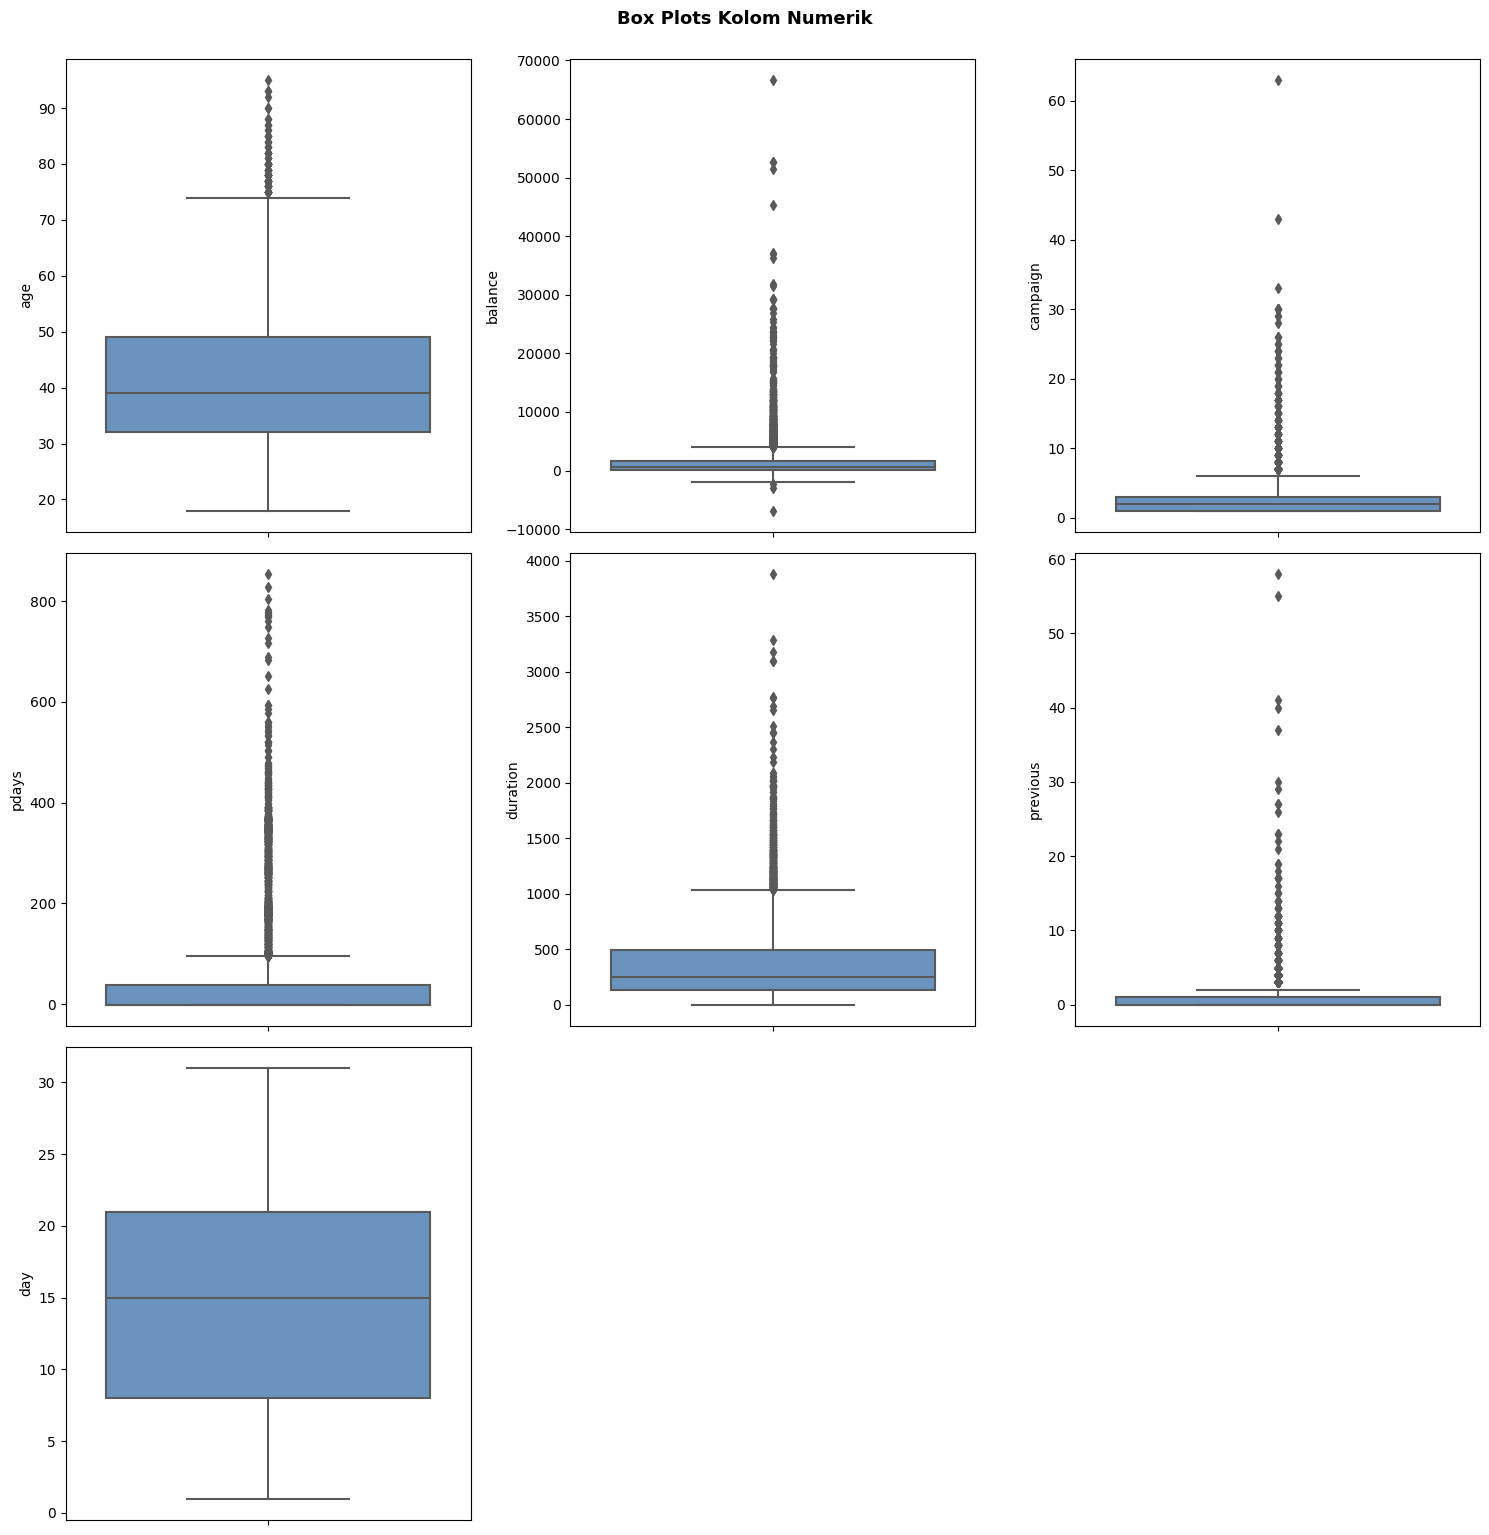

In [12]:
plt.figure(figsize=(15, 15))
n = 3
for i in range(0, len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.boxplot(y=df[numerical_columns[i]], color='#5c94cc', orient='v')
    plt.tight_layout()

plt.suptitle('Box Plots Kolom Numerik', fontsize=13, y=1.02, fontweight='bold')
plt.show

In [13]:
outlier_stats = []

for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)

    outlier_filter = (df[column] < lower_whisker) | (df[column] > upper_whisker)
    non_outlier_filter = ~outlier_filter

    n_outlier = outlier_filter.sum()
    n_non_outlier = non_outlier_filter.sum()
    outlier_percentage = (n_outlier / len(df[column])) * 100

    outlier_stats.append({
        'Column Name': column,
        'Is Outlier': outlier_filter.any(),
        'Lower Whisker': lower_whisker,
        'Upper Whisker': upper_whisker,
        'Outlier Count': n_outlier,
        'Non-Outlier Count': n_non_outlier,
        'Outlier Percentage': outlier_percentage
    })

outlier_df = pd.DataFrame(outlier_stats)
outlier_df

,Column Name,Is Outlier,Lower Whisker,Upper Whisker,Outlier Count,Non-Outlier Count,Outlier Percentage
0,age,True,6.500,74.500,121,7697,1.547710
1,balance,True,-2206.625,4016.375,738,7080,9.439754
2,campaign,True,-2.000,6.000,429,7389,5.487337
3,pdays,True,-59.125,95.875,1551,6267,19.838833
4,duration,True,-402.000,1038.000,443,7375,5.666411
5,previous,True,-1.500,2.500,888,6930,11.358404
6,day,False,-11.500,40.500,0,7818,0.000000


**Insight:**
- Dari boxplot dan ringkasan di atas, diamati bahwa hanya satu kolom, "day," tidak memiliki outlier.
- Penanganan outlier untuk kolom "balance," "previous", dan "duration" akan dilakukan menggunakan metode Windsorization dan akan diubah skala menggunakan robust scaler.
- Kolom "age" akan ditangani melalui binning, mengklasifikasikan usia berdasarkan klasifikasi usia Uni Eropa.
- Penanganan outlier untuk kolom "pdays" akan melibatkan binning dan membaginya menjadi periode kuartil. Nilai -1 akan dikategorikan sebagai "never contacted."
- Penanganan outlier dalam kolom "campaign" akan dilakukan menggunakan binning dengan strategi berbasis kuartil.
- Data numerik, seperti "balance", "previous", dan "duration", akan diubah skala menggunakan robust scaling untuk mengurangi efek skewness sambil tetap mempertahankan format numerik.

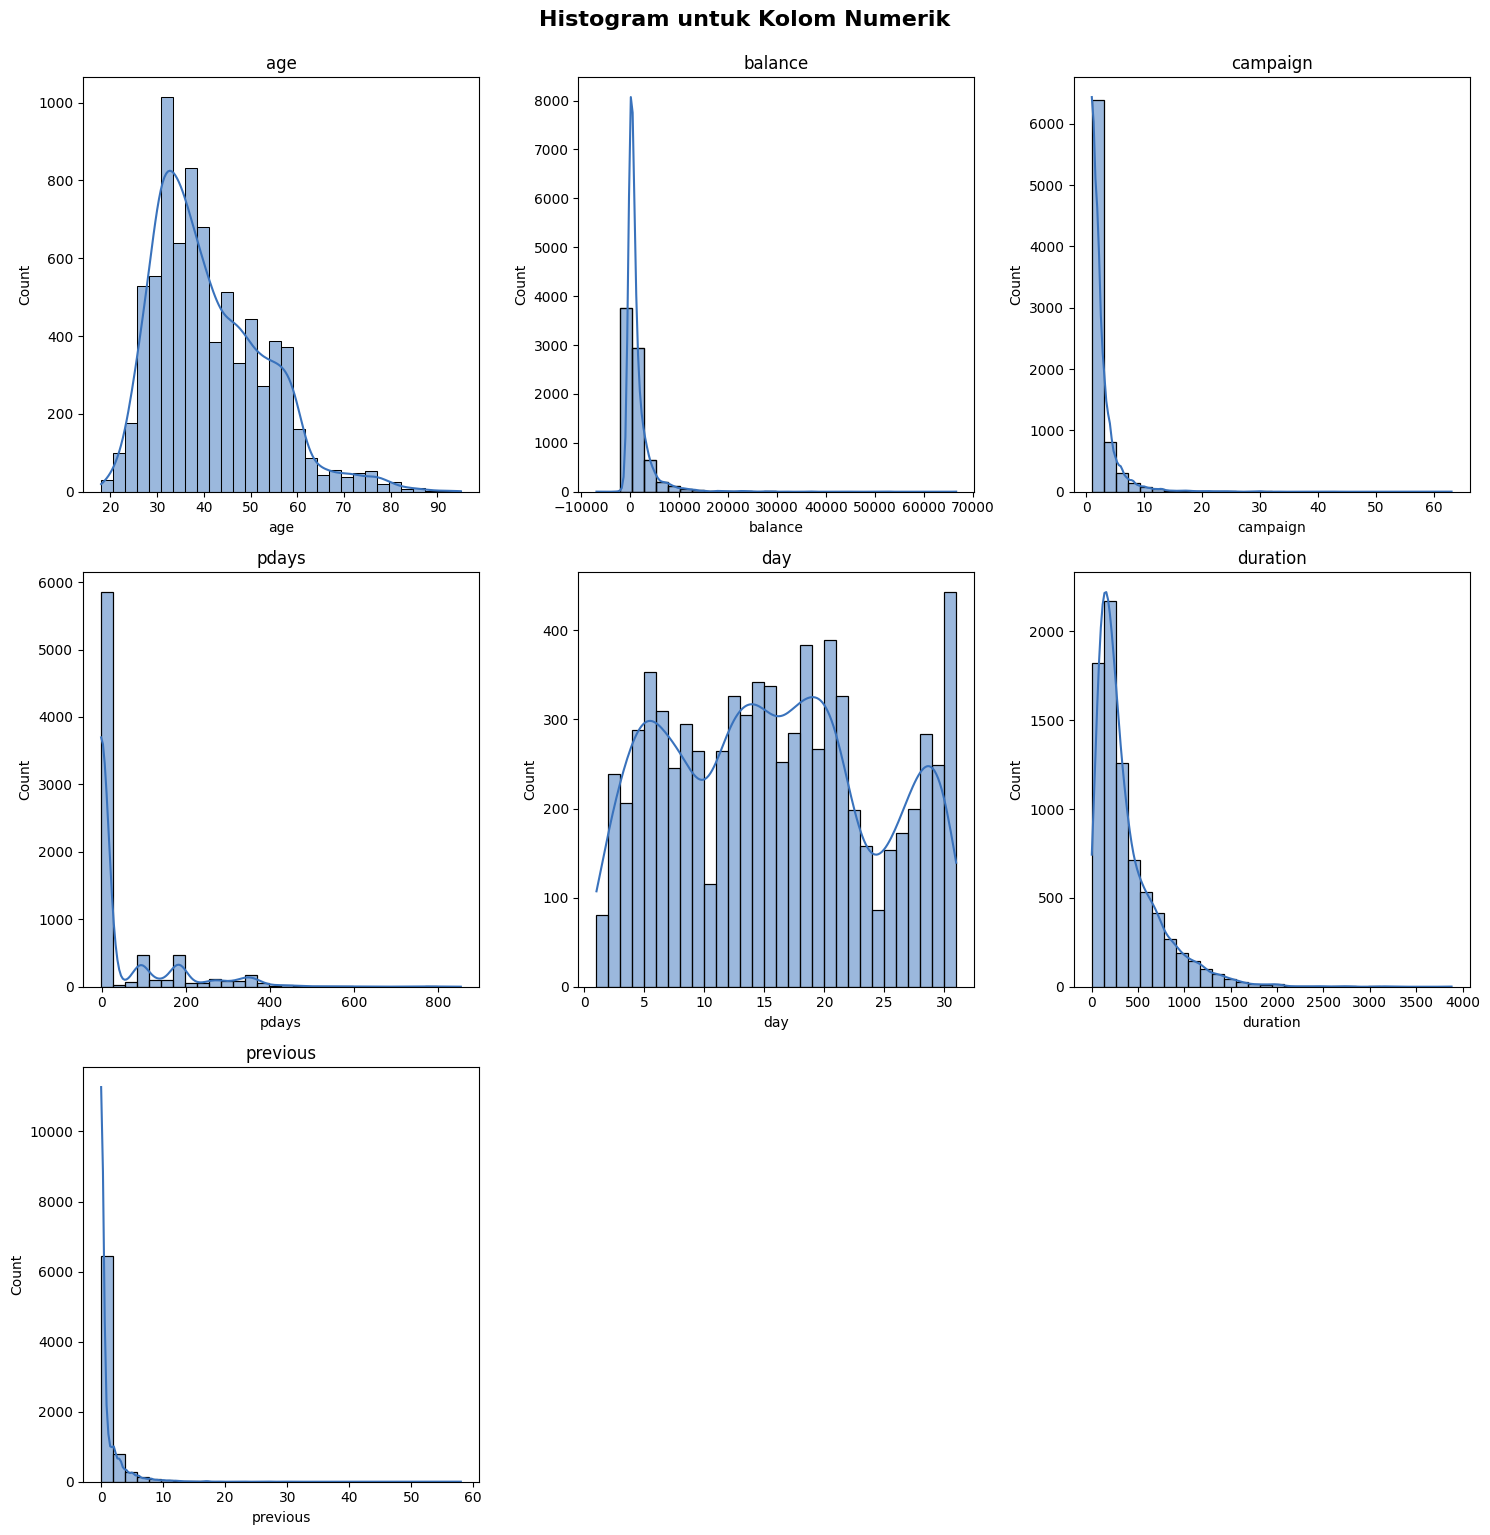

In [14]:
plt.figure(figsize=(15, 15))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
n = 3
for i in range(len(numerical_columns)):
    plt.subplot(n, math.ceil(len(numerical_columns)/n), i+1)
    sns.histplot(df[numerical_columns[i]], color='#3972bc', bins=30, kde=True)
    plt.title(numerical_columns[i])  # Added individual titles for each subplot
    plt.tight_layout()

plt.suptitle('Histogram untuk Kolom Numerik', fontsize=16, y=1.02, fontweight='bold')
plt.show()

In [15]:
from scipy.stats import skew, kurtosis

skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in numerical_columns:
    data = df[column].dropna()
    skew_val = round(skew(data, nan_policy="omit"), 3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"), 3)

    if abs(skew_val) < 0.2:
        skew_type = "Normal Distribution (Symmetric)"
    elif skew_val < 0:
        skew_type = "Negatively Skewed"
    else:
        skew_type = "Positively Skewed"

    if column in ["Z_CostContact", "Z_Revenue"]:
        skew_type = "Uniform Distribution"
    elif column in ["Kidhome", "Teenhome"]:
        skew_type = "Bimodal Distribution"

    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)

dist = pd.DataFrame({
    "Nama Kolom": numerical_columns,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Tipe Distribusi": skew_type_list
})
dist

,Nama Kolom,Skewness,Kurtosis,Tipe Distribusi
0,age,0.868,0.625,Positively Skewed
1,balance,6.761,80.238,Positively Skewed
2,campaign,5.539,59.929,Positively Skewed
3,pdays,2.412,6.570,Positively Skewed
4,day,0.123,-1.049,Normal Distribution (Symmetric)
5,duration,2.169,7.576,Positively Skewed
6,previous,7.935,118.433,Positively Skewed


**Insight:**
- Dari pengamatan histogram, terlihat bahwa hampir semua variabel memiliki outlier, kecuali variabel 'day'. Selain itu, diketahui bahwa sebagian besar distribusi variabel cenderung condong ke kanan (positif). Untuk menangani ketidaknormalan ini, akan digunakan metode robust scaling.

## **Exploratory Data Analysis**

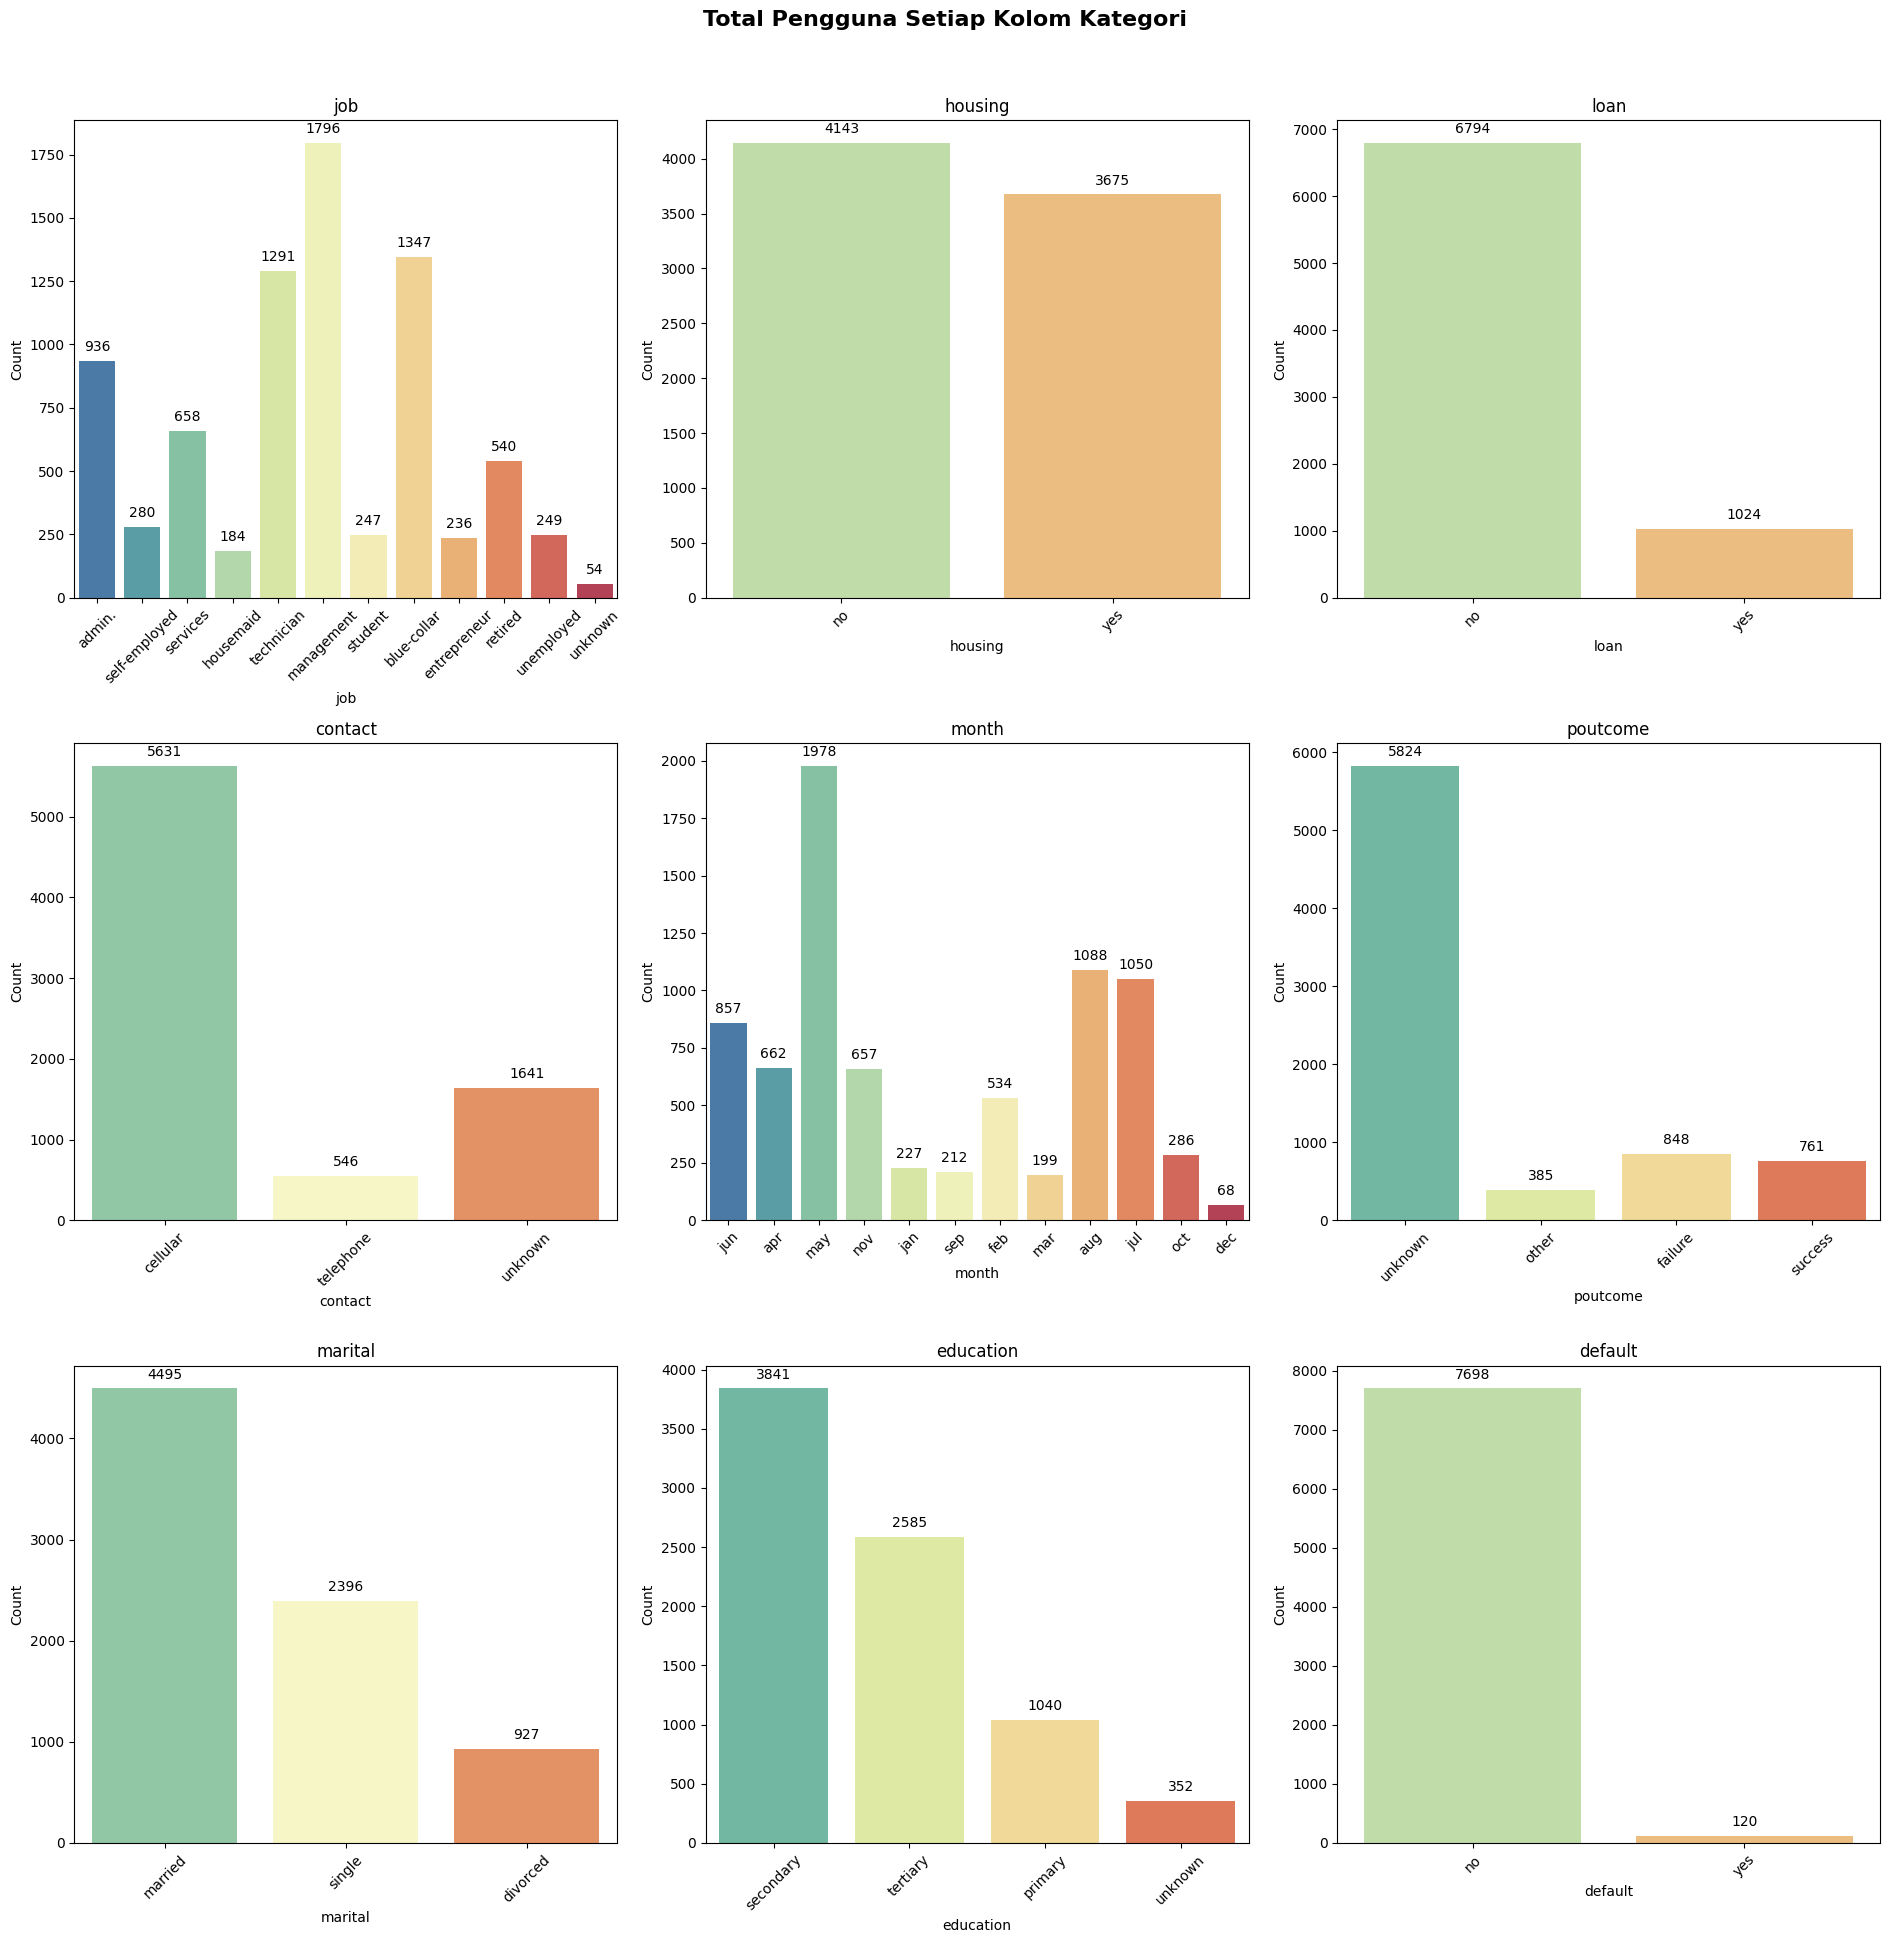

In [16]:
cat_cols = categorical_columns.copy()

plt.figure(figsize=(19, 19))
n = 3
for i, column in enumerate(cat_cols):
    plt.subplot(n, math.ceil(len(cat_cols)/n), i+1)
    ax = sns.countplot(x=column, data=df, palette='Spectral_r')
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.title(column)
    plt.ylabel('Count')

plt.suptitle('Total Pengguna Setiap Kolom Kategori', fontsize=16, y=1.02, fontweight='bold')
plt.tight_layout()
plt.show()

#### **Demographic Data & Target**

Analisis data demografis dan variabel target bertujuan untuk memahami hubungan antara faktor demografis dan perilaku investasi dalam deposito berjangka. Ini membantu bank mengenali profil demografis calon nasabah.

- **Job vs Deposit**

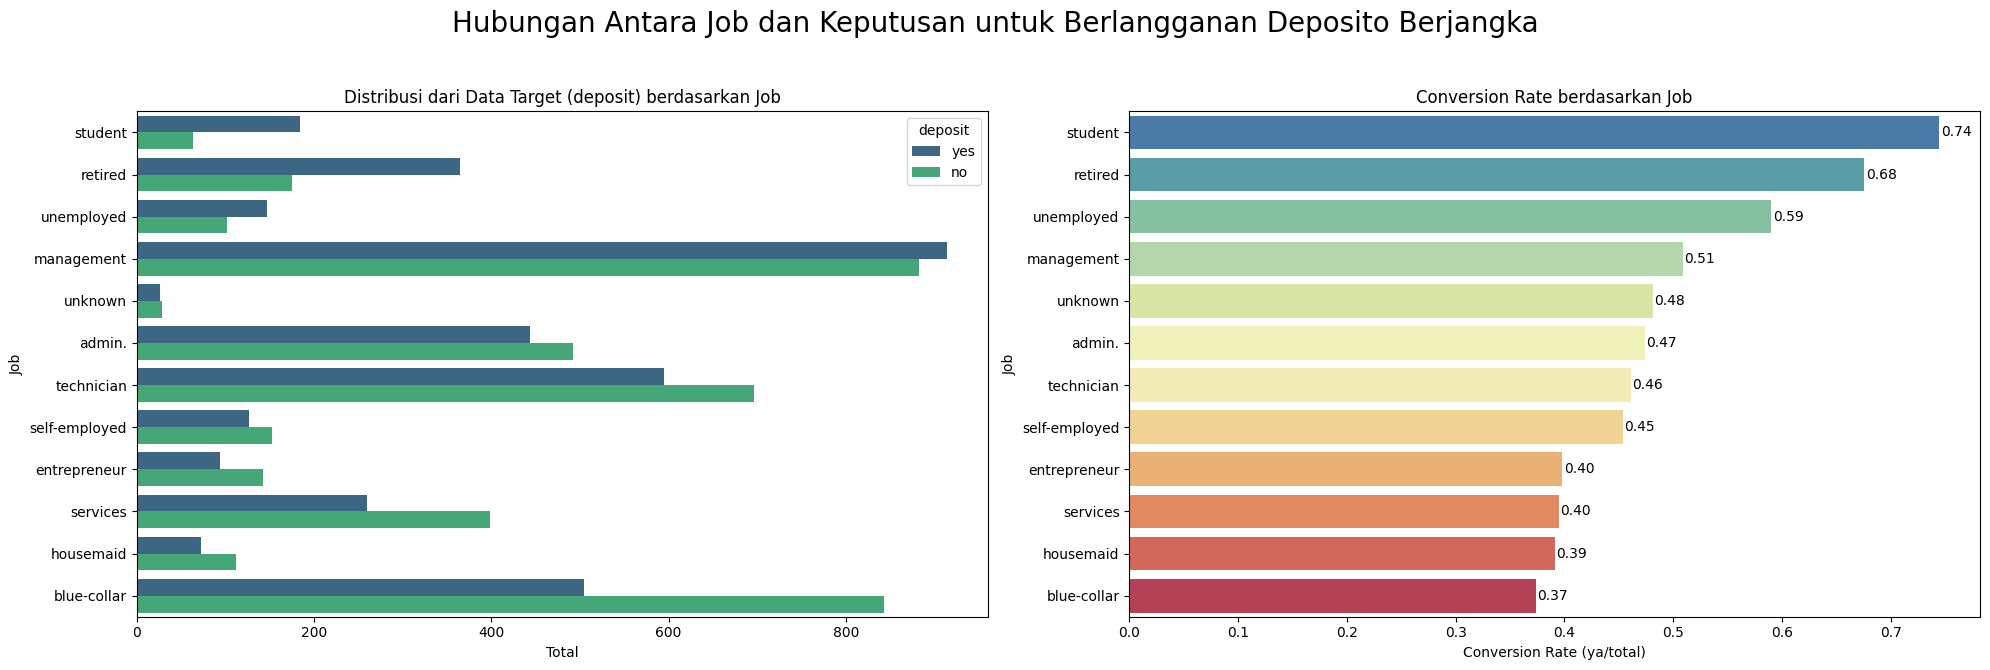

In [17]:
def crosstab_deposit(df, column_name):
    crosstab = pd.crosstab(df[column_name], df['deposit'])
    crosstab['conversion_rate'] = crosstab['yes'] / (crosstab['yes'] + crosstab['no'])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7), dpi=100)
    plt.suptitle(f'Hubungan Antara {column_name.capitalize()} dan Keputusan untuk Berlangganan Deposito Berjangka', size=20)

    # Distribution of target data based on the column
    sns.countplot(hue='deposit', y=column_name, data=df, palette='viridis', ax=axes[0],
                  order=crosstab.sort_values('conversion_rate', ascending=False).index)
    axes[0].set_title(f'Distribusi dari Data Target (deposit) berdasarkan {column_name.capitalize()}')
    axes[0].set_ylabel(column_name.capitalize())
    axes[0].set_xlabel('Total')
     
    # Conversion rate by the column
    sns.barplot(x='conversion_rate', y=crosstab.index, data=crosstab.reset_index(),
                palette='Spectral_r', ax=axes[1], order=crosstab.sort_values('conversion_rate', ascending=False).index)
    axes[1].set_title(f'Conversion Rate berdasarkan {column_name.capitalize()}')
    axes[1].set_xlabel('Conversion Rate (ya/total)')
    axes[1].set_ylabel(column_name.capitalize())
    
    # Add value labels
    for p in axes[1].patches:
        axes[1].annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                         ha='center', va='center', xytext=(12, 0), textcoords='offset points')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Example usage: 
crosstab_deposit(df, 'job')

**Insight:**

- Berbagai pekerjaan memiliki tingkat investasi yang berbeda dalam deposito berjangka, menunjukkan pengaruh pekerjaan terhadap keputusan investasi seseorang.

- Tren unik menunjukkan bahwa students, retirees, dan unemployed, yang diduga tidak memiliki pendapatan tetap, memiliki tingkat konversi yang lebih tinggi dibandingkan dengan pekerjaan lain dengan pendapatan tetap seperti marketing, admin, dan technicians. Hal ini mungkin karena dana investasi mereka berasal dari tabungan. Tanpa pendapatan tetap, mereka lebih memilih untuk berinvestasi dalam opsi yang stabil, berisiko rendah, dan memberikan bunga.

- Orang-orang dengan pekerjaan tetap seperti management, admin, dan technicians menunjukkan minat yang lebih rendah dalam deposito berjangka, kemungkinan karena pendapatan reguler memungkinkan mereka untuk mengejar investasi dengan tingkat pengembalian yang lebih tinggi dan berisiko lebih tinggi.

- Self-employed memiliki tingkat konversi yang mirip dengan office workers, menunjukkan perilaku investasi yang serupa terhadap deposito berjangka.

- Service workers, housemaids, and blue-collar workers memiliki tingkat konversi yang lebih rendah, yang mungkin disebabkan oleh tingkat pendapatan yang lebih rendah atau kurangnya literasi keuangan.

- **Education vs Deposit**

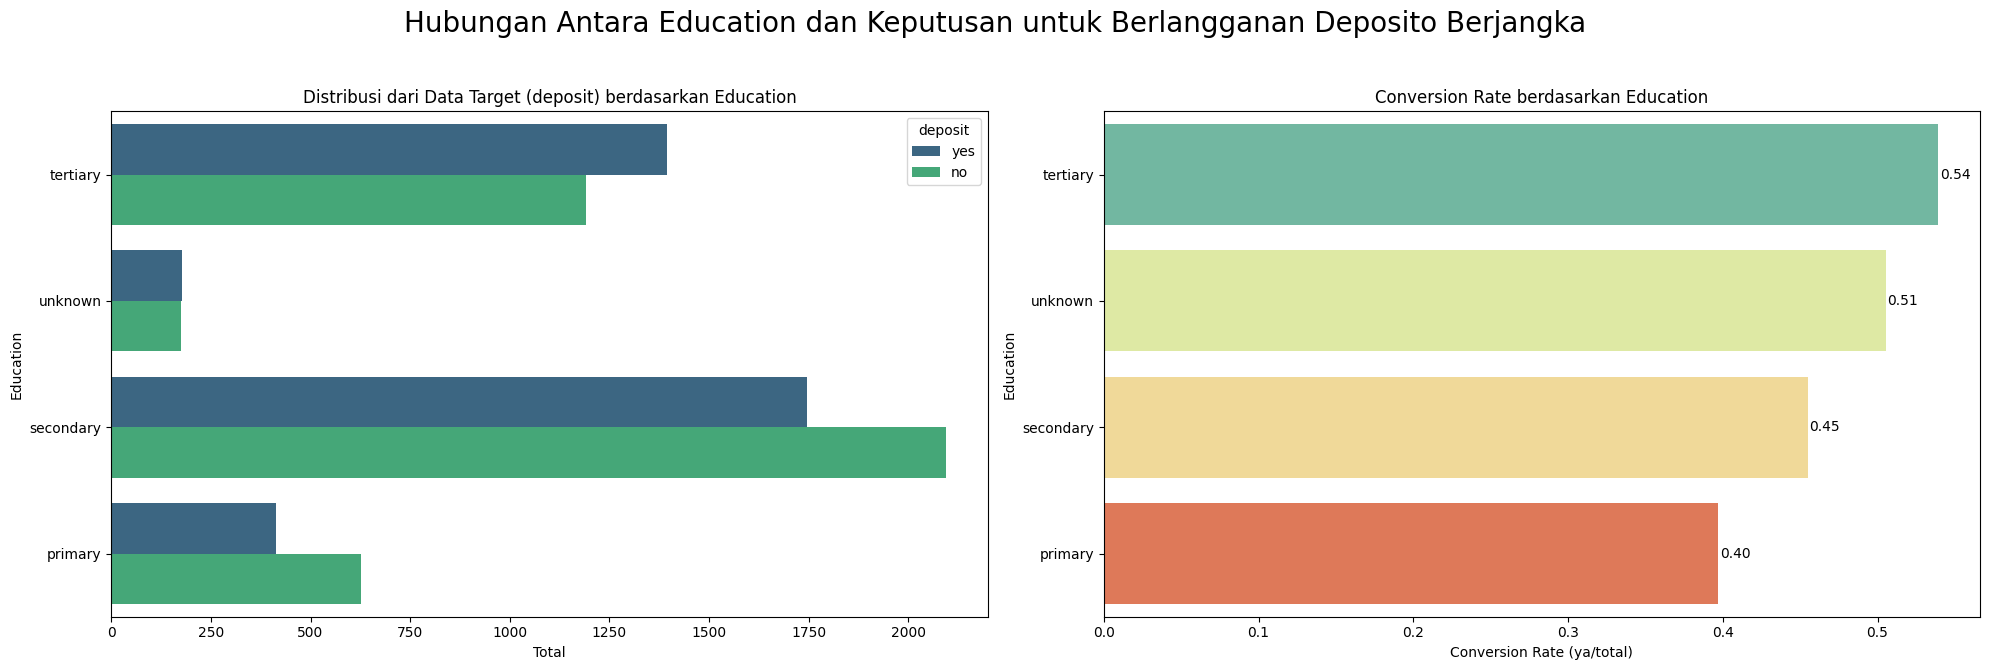

In [18]:
crosstab_deposit(df, 'education')

**Insight:**

- Semakin tinggi tingkat pendidikan seseorang, semakin tinggi tingkat konversi ke deposito berjangka. Hal ini bisa disebabkan oleh faktor-faktor seperti tingkat pendapatan, preferensi investasi, pengetahuan keuangan, dan akses terhadap informasi.

- **Marital vs Deposit**

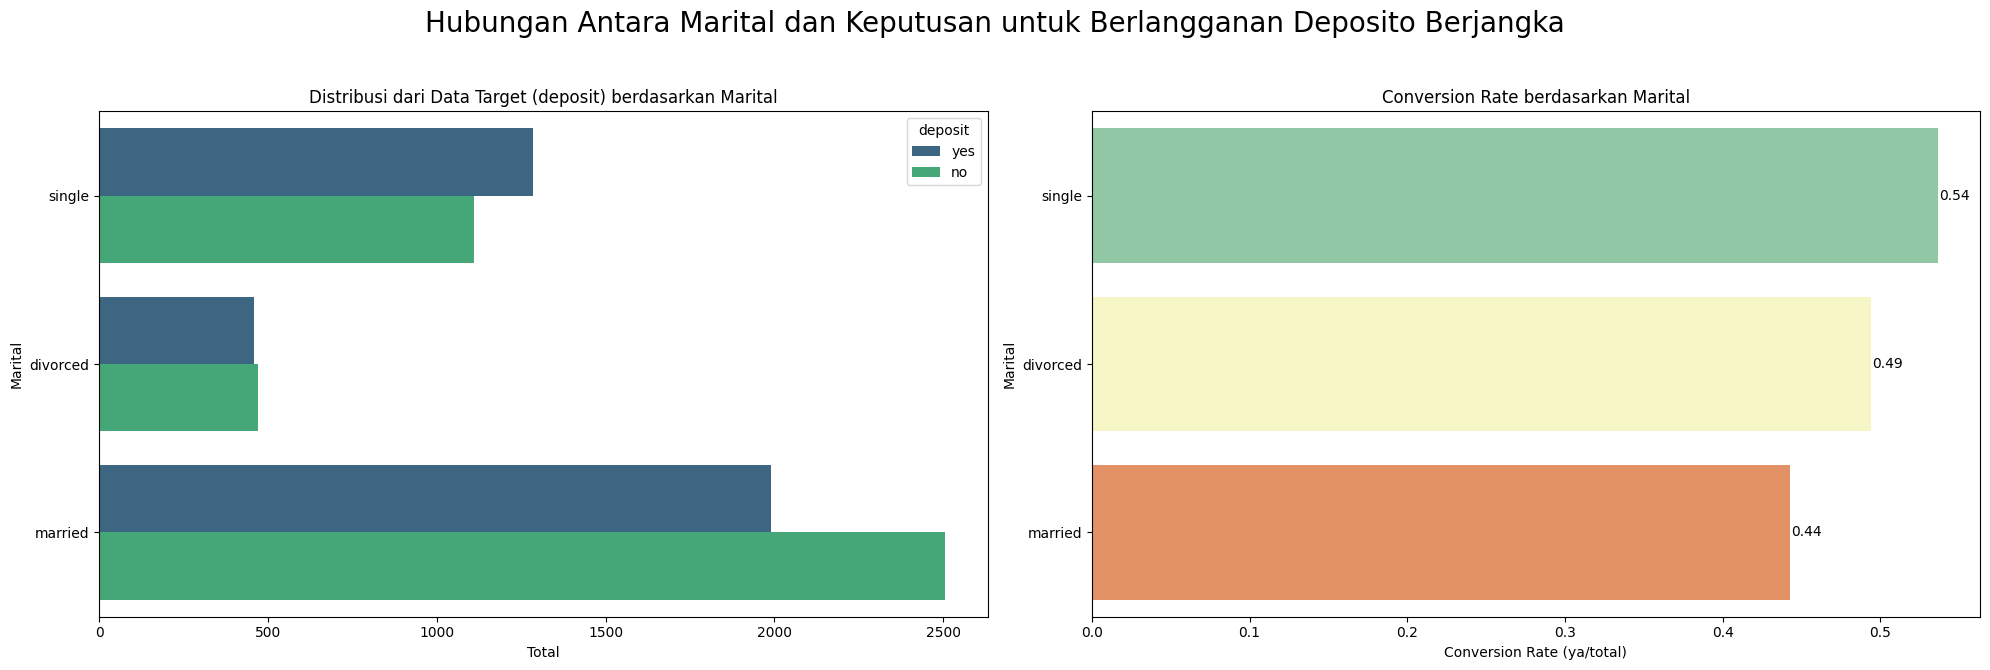

In [19]:
crosstab_deposit(df, 'marital')

**Insight:**

- Status pernikahan yang berbeda memiliki tingkat konversi yang berbeda, menunjukkan bahwa status pernikahan dapat memengaruhi perilaku investasi seseorang.

- Individu yang belum menikah memiliki tingkat konversi yang lebih tinggi, mungkin karena mereka memiliki lebih banyak kebebasan untuk menggunakan pendapatan atau tabungan mereka untuk investasi karena tidak memiliki tanggung jawab rumah tangga.

- Di antara pelanggan dengan status pernikahan yang belum menikah, jumlah pelanggan yang berinvestasi dalam deposito berjangka lebih tinggi daripada mereka yang tidak melakukannya. Oleh karena itu, bank harus lebih memperhatikan potensi pelanggan yang belum menikah.

- **Age vs Deposit**

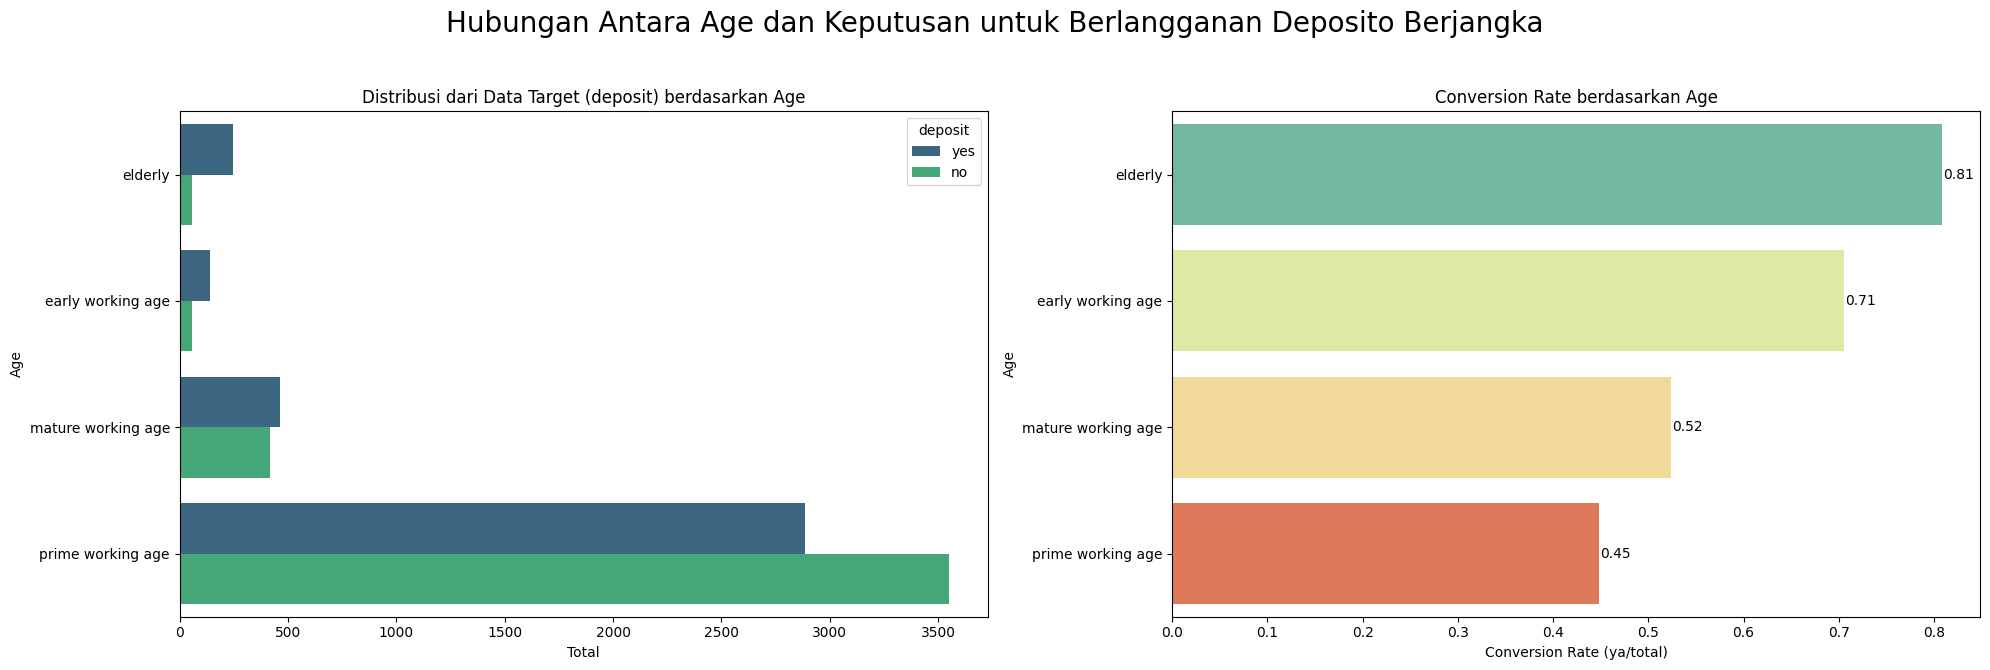

In [20]:
df_n = df.copy()
bins = [0, 14, 24, 54, 64, np.inf]
labels = ['children', 'early working age', 'prime working age', 'mature working age', 'elderly']
df_n['age'] = pd.cut(df_n['age'], bins=bins, labels=labels, right=True)

crosstab_deposit(df_n, 'age')

**Insight:**

- Elderly memiliki tingkat konversi tertinggi, mungkin karena uang yang mereka investasikan berasal dari tabungan mereka. Oleh karena itu, mereka lebih memilih investasi jangka panjang dengan tingkat bunga tetap dan risiko rendah.

- Individu pada early working-age memiliki tingkat konversi yang lebih tinggi untuk deposito berjangka dibandingkan dengan kelompok mature dan prime working-age. Hal ini mungkin karena, pada usia ini, tingkat pendapatan mereka relatif rendah, sehingga mereka memilih opsi investasi dengan risiko rendah.

- Mature dan prime working-age memiliki tingkat konversi yang rendah, mungkin karena dengan tingkat pendapatan yang lebih tinggi, mereka memiliki lebih banyak fleksibilitas untuk memilih jenis investasi lainnya.

- Di antara empat kategori usia, hanya kategori prime working-age yang memiliki jumlah pelanggan yang lebih sedikit berinvestasi dalam deposito berjangka dibandingkan dengan mereka yang tidak. Mengingat jumlah pelanggan yang besar dalam kategori ini dan potensi mereka, bank dapat meningkatkan intensitas kampanye yang ditargetkan kepada pelanggan usia kerja primer.

#### **Financial Data & Target**

Data keuangan adalah catatan keuangan historis seorang nasabah, termasuk pinjaman rumah, utang, dan gagal bayar. Dengan memahami hubungan antara catatan keuangan seorang nasabah dan variabel target, bank dapat mengidentifikasi nasabah potensial dan mereka yang mungkin bukan potensial berdasarkan riwayat keuangan mereka.

- **Loan vs Deposit**

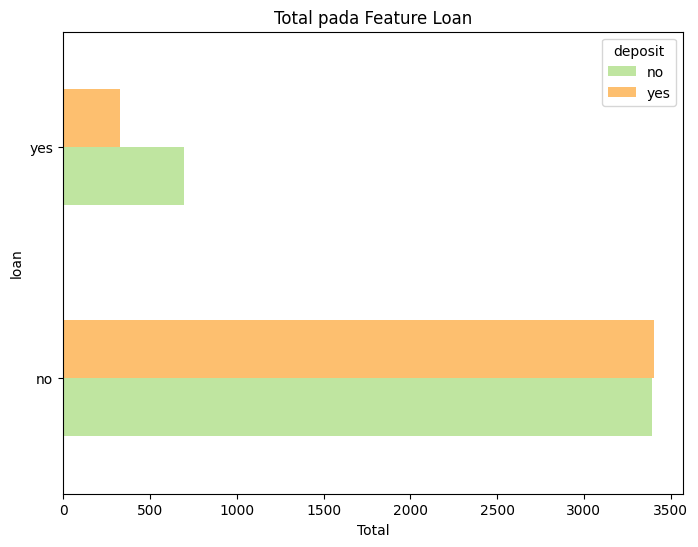

deposit,loan,no,yes,conversion_rate
0,no,3392,3402,0.500736
1,yes,694,330,0.322266


In [21]:
def ct_binary(df, column_name):
    # Crosstab for count plot
    count_crosstab = pd.crosstab(df[column_name], df['deposit'])
    ax = count_crosstab.plot(kind='barh', color=sns.color_palette('Spectral_r', len(count_crosstab.columns)), figsize=(8, 6))
    ax.set_title(f'Total pada Feature {column_name.capitalize()}')
    ax.set_xlabel('Total')
    plt.show()

    # Crosstab for conversion rate
    conversion_crosstab = count_crosstab.assign(
        conversion_rate=lambda x: x['yes'] / (x['yes'] + x['no'])
    ).reset_index()

    return conversion_crosstab

# Example usage: 
ct_binary(df, 'loan')

**Insight:**

- Pelanggan dengan pinjaman cenderung memiliki tingkat konversi yang lebih rendah. Hal ini menunjukkan bahwa keberadaan atau ketiadaan pinjaman dapat memengaruhi perilaku investasi seseorang.

- Orang-orang dengan pinjaman, terutama pinjaman konsumtif, cenderung memiliki kecenderungan yang lebih rendah untuk berinvestasi atau mungkin sama sekali tidak berinvestasi.

- **Housing vs Deposit**

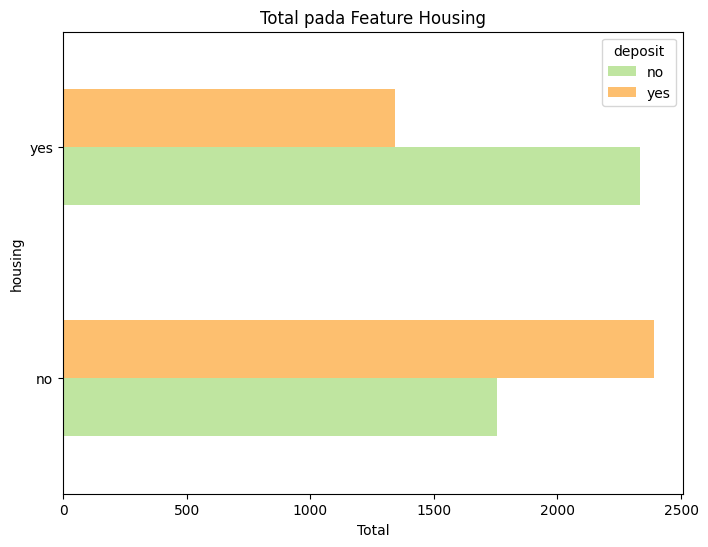

deposit,housing,no,yes,conversion_rate
0,no,1754,2389,0.576635
1,yes,2332,1343,0.365442


In [22]:
ct_binary(df, 'housing')

**Insight:**

- Individual yang memiliki kredit rumah memiliki tingkat konversi yang lebih rendah. Ini menunjukkan bahwa keberadaan atau ketiadaan kredit rumah dapat memengaruhi perilaku investasi seseorang.

- Di antara pelanggan tanpa kredit rumah, jumlah mereka yang berinvestasi dalam deposito berjangka jauh lebih tinggi dibandingkan dengan mereka yang tidak berinvestasi dalam deposito berjangka. Ini menunjukkan bahwa individu tanpa kredit rumah adalah calon pelanggan yang layak mendapat perhatian dalam kampanye bank.

- **Default vs Deposit**

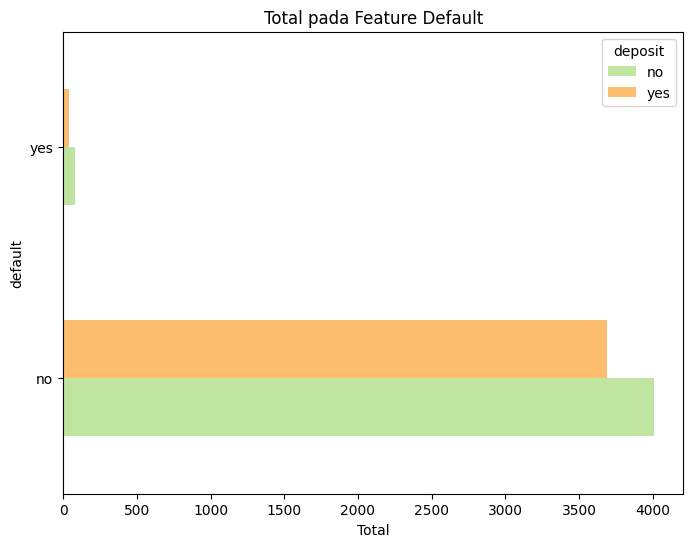

deposit,default,no,yes,conversion_rate
0,no,4006,3692,0.479605
1,yes,80,40,0.333333


In [23]:
ct_binary(df, 'default')

**Insight:**

- Individual yang gagal bayar cenderung memiliki tingkat konversi yang lebih rendah dibandingkan dengan mereka yang tidak gagal bayar. Hal ini masuk akal karena pelanggan yang gagal melakukan pembayaran dapat diasumsikan mengalami kesulitan keuangan, yang berarti mereka memiliki dana terbatas yang tersedia untuk deposito.

#### **Campaign Data & Target**

Data kampanye berkaitan dengan catatan upaya kampanye yang dilakukan oleh bank, seperti waktu, durasi, dan kontak. Dengan membandingkan data kampanye dengan target, diharapkan dapat memberikan wawasan tentang aspek kampanye yang mendukung pelanggan dalam berinvestasi dalam deposito berjangka dan yang mungkin kurang mendukung. Memahami korelasi antara aspek kampanye dan variabel target memungkinkan bank untuk merancang strategi untuk memperkuat aspek kampanye yang berkorelasi dengan target.

- **Month vs Deposit**

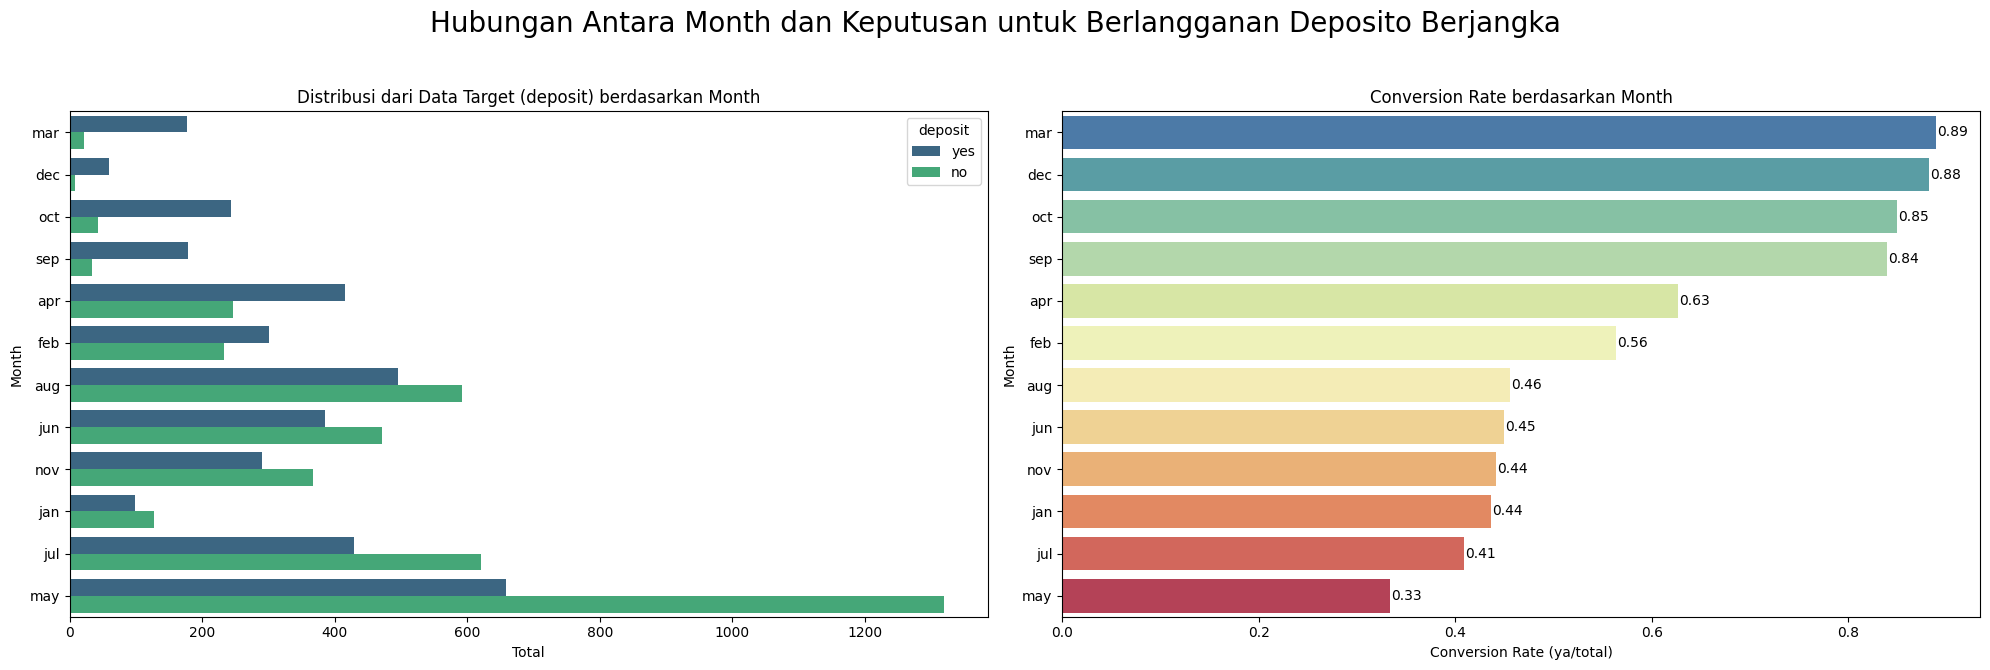

In [24]:
crosstab_deposit(df, 'month')

**Insight:**

- Bulan dengan tingkat konversi tertinggi adalah Maret, diikuti oleh Desember, Oktober, dan September. Namun, ketika melihat data, jumlah pelanggan yang dihubungi pada bulan-bulan ini lebih rendah dibandingkan dengan bulan lainnya. Selain itu, jumlah pelanggan yang berinvestasi dalam deposito berjangka jauh lebih tinggi daripada mereka yang tidak berinvestasi. Hal ini menunjukkan adanya pola pemasaran melalui telepon yang lebih efisien pada bulan-bulan ini, meskipun jumlah kontak secara keseluruhan lebih rendah dibandingkan dengan bulan lainnya.

- Bulan dengan jumlah pelanggan yang berinvestasi dalam deposito berjangka tertinggi adalah Mei. Namun, karena dalam bulan yang sama, jumlah pelanggan yang dihubungi dan tidak berinvestasi dalam deposito berjangka jauh lebih tinggi, tingkat konversi untuk bulan tersebut rendah.

- Dengan mempertimbangkan jumlah pelanggan yang dihubungi pada bulan Mei, bank terlihat menerapkan strategi untuk menghubungi sebanyak mungkin pelanggan untuk menarik sebanyak mungkin investor deposito berjangka. Namun, karena kurangnya prediksi yang akurat, pendekatan ini menyebabkan ketidakefisienan dengan menghubungi banyak pelanggan yang bukan berpotensi. Dalam kasus seperti ini, diperlukan model klasifikasi.

- **Poutcome vs Deposit**

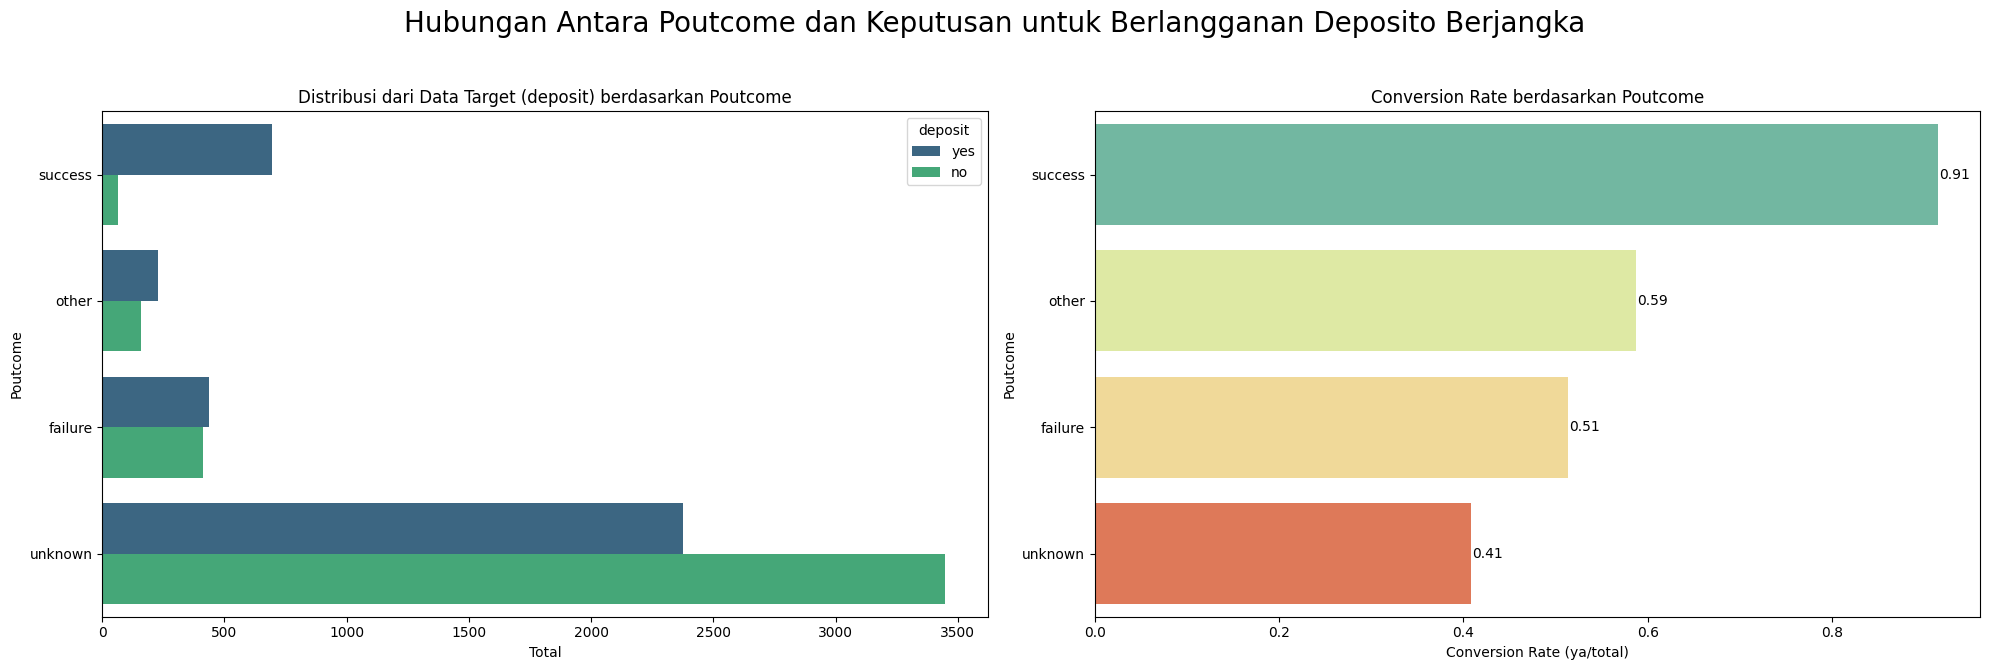

In [25]:
crosstab_deposit(df, 'poutcome')

**Insight:**

- Pelanggan dengan hasil kampanye sebelumnya yang berhasil memiliki tingkat konversi yang signifikan lebih tinggi dibandingkan dengan kategori hasil lainnya. Hal ini seharusnya mendorong bank untuk mengembangkan strategi untuk meningkatkan hasil yang berhasil dalam setiap kampanye.

- Pada kategori "other" dan "failure", jumlah pelanggan yang berinvestasi dalam deposito berjangka sedikit lebih tinggi dibandingkan dengan mereka yang tidak berinvestasi. Hal ini menunjukkan bahwa meskipun hasil kampanye sebelumnya adalah kegagalan, masih ada kemungkinan bahwa pelanggan ini bersedia untuk berinvestasi. Oleh karena itu, terlepas dari kegagalan kampanye dengan seorang pelanggan, bank harus mempertimbangkan untuk tetap berkomunikasi jika pelanggan tersebut berpotensi tertarik.

- Kategori "unknown" secara signifikan melampaui kategori lainnya dalam hal jumlah. Untuk mendapatkan wawasan dari jumlah pelanggan yang besar ini, bank harus meningkatkan manajemen data untuk meminimalkan jumlah data yang tidak diketahui.

- **Contact vs Deposit**

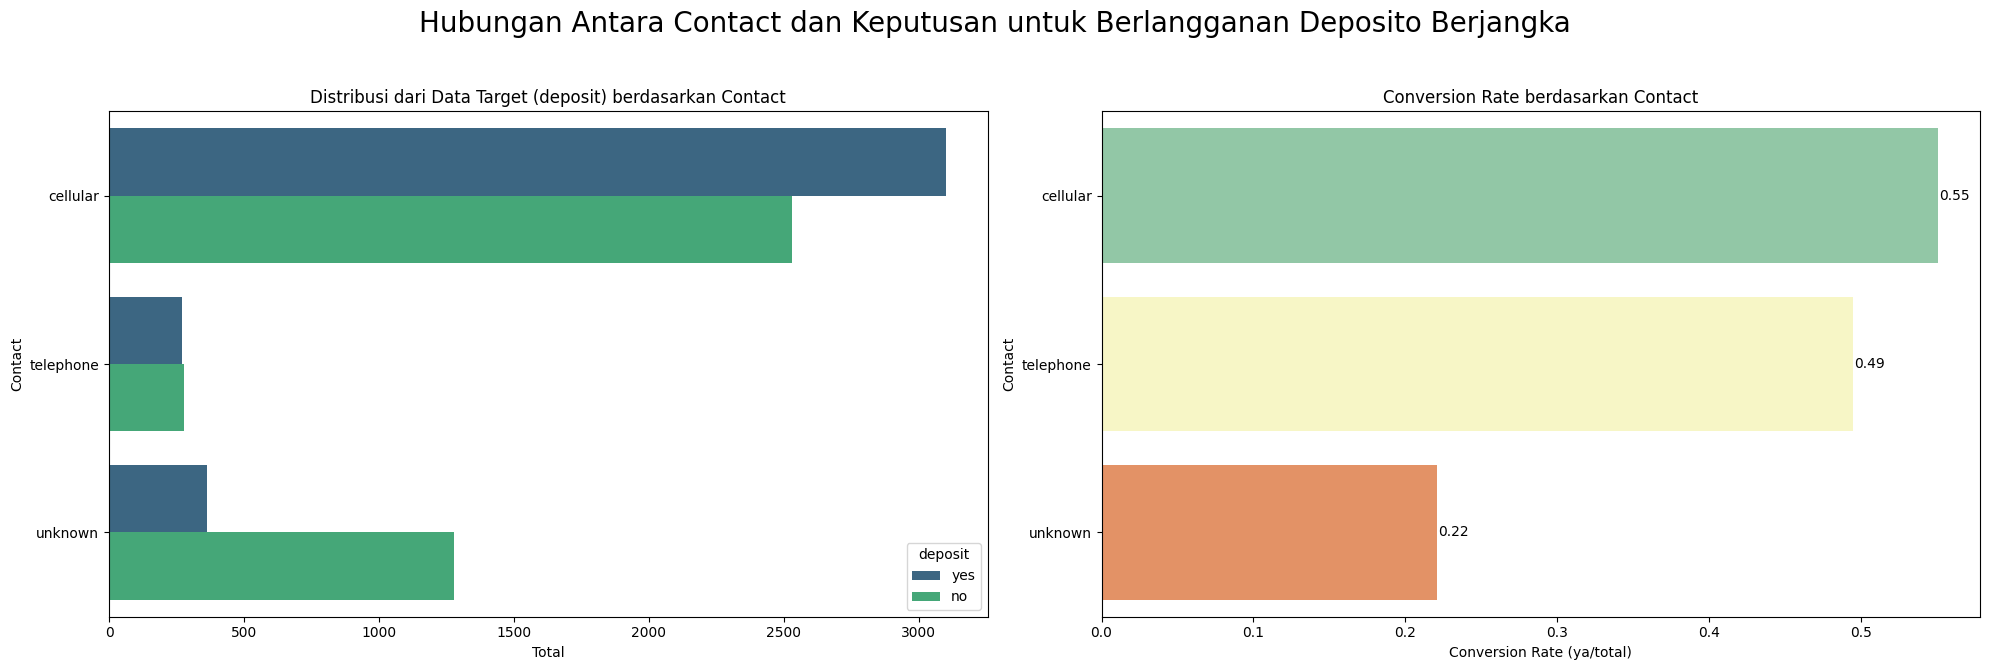

In [26]:
crosstab_deposit(df, 'contact')

**Insight:**

- Tingkat konversi untuk panggilan via cellular lebih tinggi dibandingkan dengan metode lainnya. Hal ini mungkin karena sebagian besar orang sekarang lebih terbiasa berbicara di telepon seluler mereka. Selain itu, peluang panggilan dijawab lebih tinggi karena orang selalu membawa telepon seluler mereka. Dalam hal ini, bank perlu mempertahankan dan lebih mengembangkan kontak seluler yang sudah dimilikinya untuk keperluan kampanye.

- Perbedaan antara pelanggan yang berinvestasi dalam deposito berjangka dan mereka yang tidak melalui kontak via phone sangat minim. Hal ini menunjukkan bahwa kontak telepon tetap menjadi metode yang layak, terutama bagi pelanggan yang memilihnya. Untuk efisiensi, bank juga perlu menentukan preferensi kontak dari pelanggan-pelanggannya untuk menyesuaikan pendekatan secara tepat.

- Kategori "unknown" masih cukup besar. Bank perlu meningkatkan manajemen data untuk meminimalkan keberadaan kategori tidak diketahui dan mengekstrak wawasan dari data tersebut.

### **Feature**

In [27]:
dff = df.copy()
month_mapping = {'jan': 0, 'feb': 1, 'mar': 2, 'apr': 3, 'may': 4, 'jun': 5, 'jul': 6, 'aug': 7, 'sep': 8, 'oct': 9, 'nov': 10, 'dec': 11}
poutcome_mapping = {'unknown': 0, 'other': 1, 'failure': 2, 'success': 3}
binary_mapping = {'yes' : 1, 'no' : 0}


dff['month'] = dff['month'].replace(month_mapping)
dff['poutcome'] = dff['poutcome'].replace(poutcome_mapping)
dff['housing'] = dff['housing'].replace(binary_mapping)
dff['loan'] = dff['loan'].replace(binary_mapping)
dff['deposit'] = dff['deposit'].replace(binary_mapping)
dff['default'] = dff['default'].replace(binary_mapping)

df_encoded = pd.get_dummies(dff, columns=['job', 'contact', 'marital'])

#### **Rare Label**

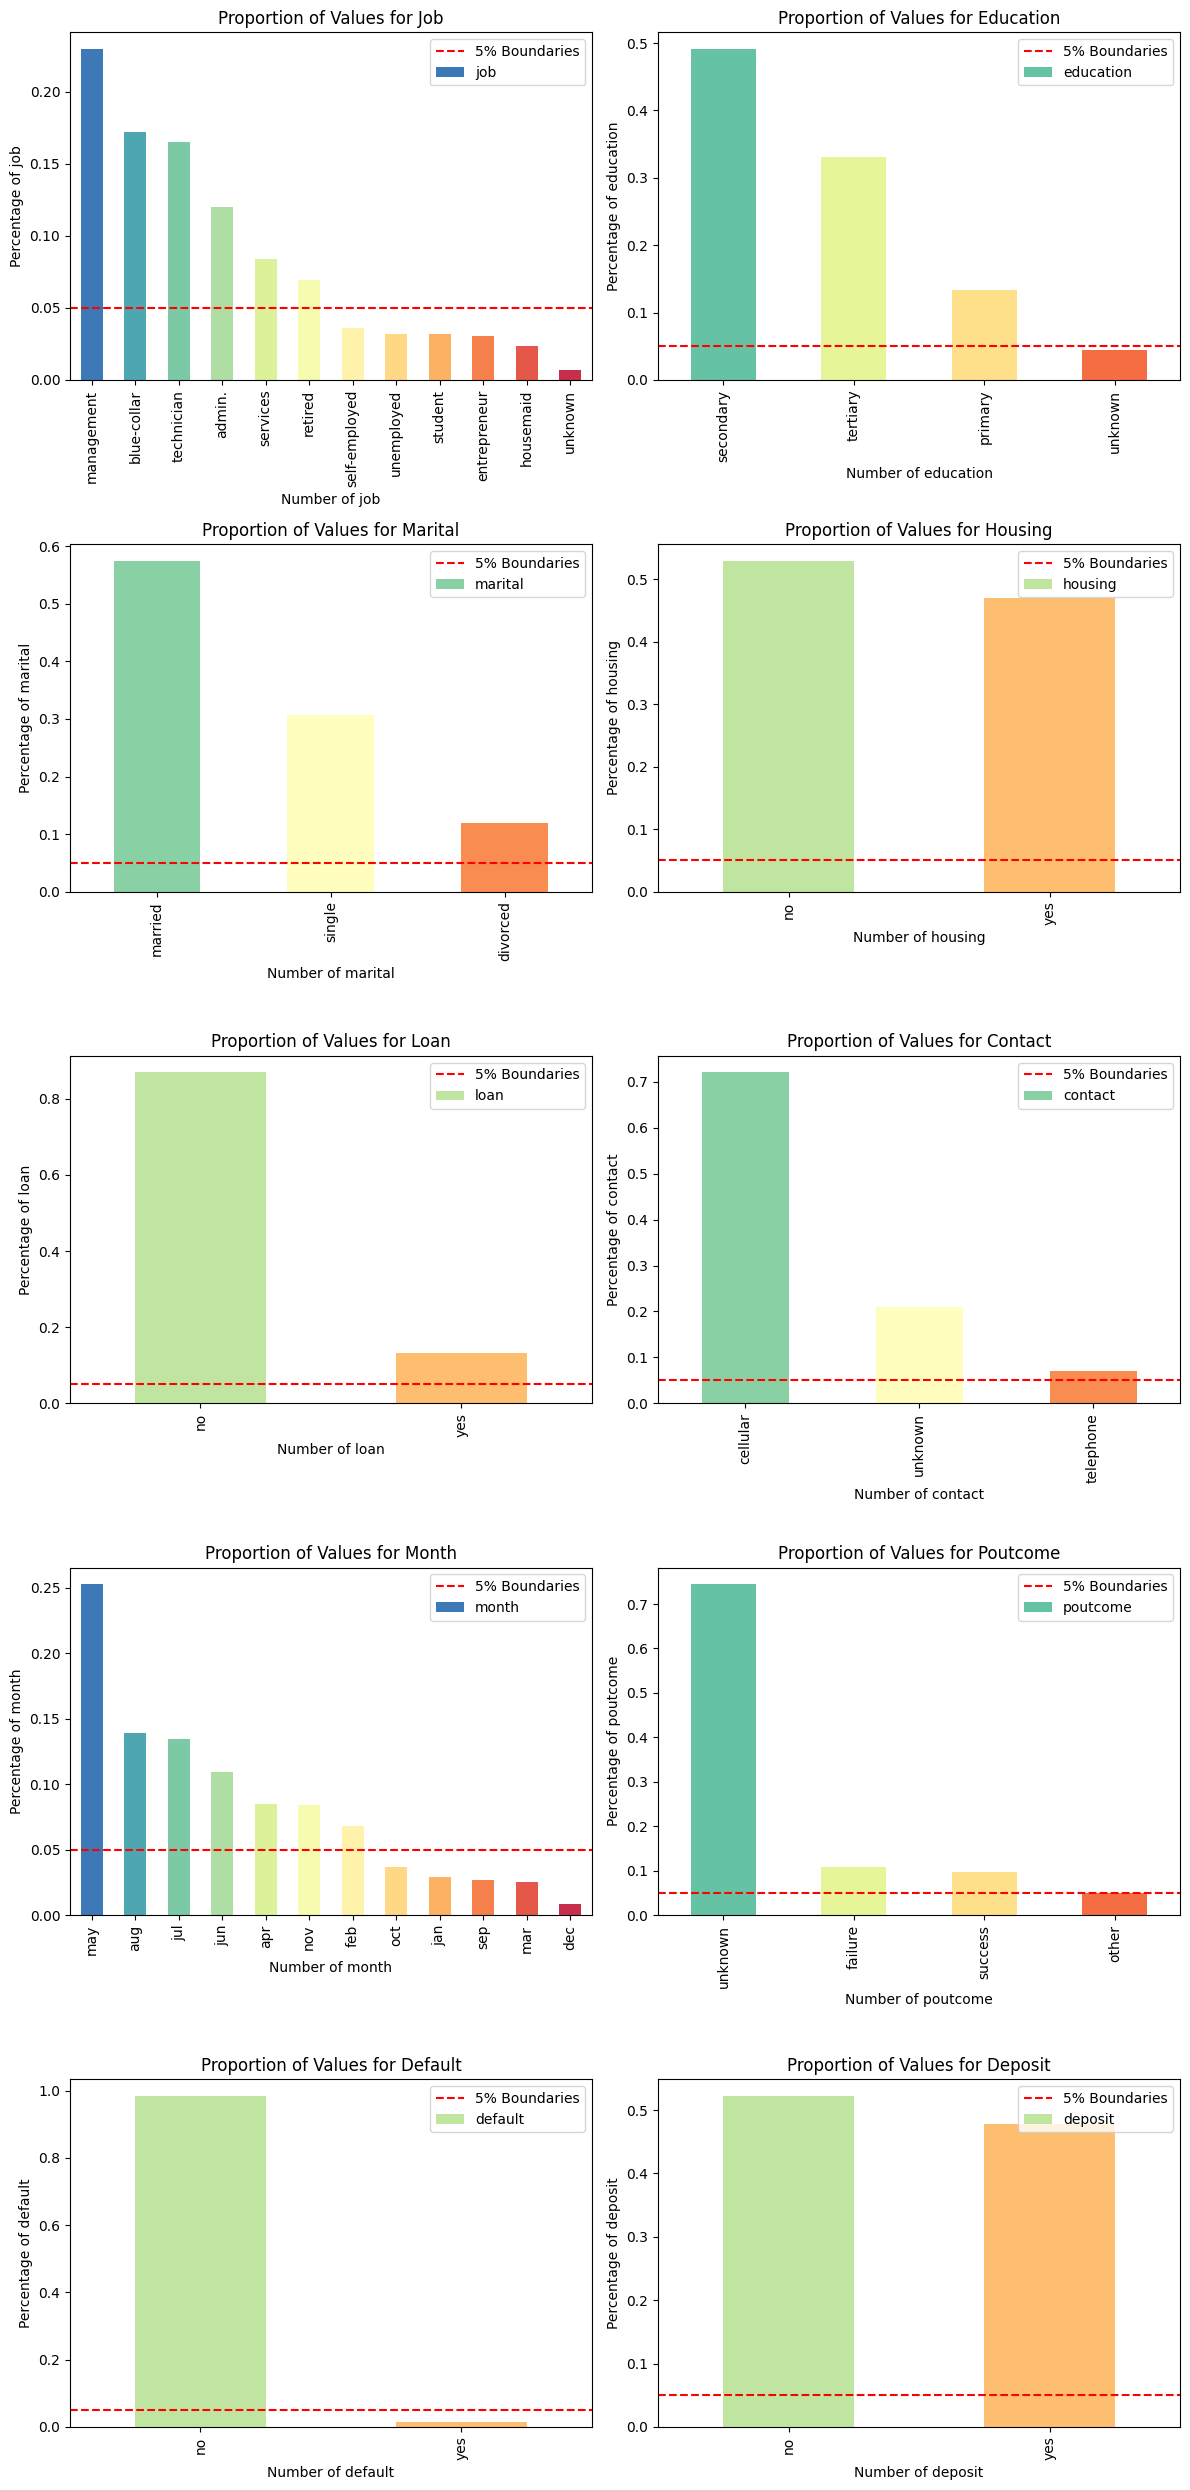

In [28]:
def plot_categorical_proportions(df, columns):

    n_cols = 2
    n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows*5))
    axes = axes.flatten()  
    
    for ax, column in zip(axes, columns):
        # Calculate the value counts and their proportions
        value_counts = df[column].value_counts(normalize=True).sort_values(ascending=False)
        
        # Create the bar plot
        value_counts.plot(kind='bar', ax=ax, color=sns.color_palette('Spectral_r', len(value_counts)))
        
        # Add a horizontal line at 5%
        ax.axhline(y=0.05, color='red', linestyle='--', label='5% Boundaries')
        
        # Set title and labels
        ax.set_title(f'Proportion of Values for {column.capitalize()}')
        ax.set_xlabel(f'Number of {column}')
        ax.set_ylabel(f'Percentage of {column}')
        
        # Add legend
        ax.legend()

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Define your columns
columns = ['job', 'education', 'marital', 'housing', 'loan', 'contact', 'month', 'poutcome', 'default', 'deposit']

# Example usage with your dataframe
plot_categorical_proportions(df, columns)

**Insight:**
- Pada kolom 'job', beberapa kategori dianggap sebagai 'rare label' karena mewakili kurang dari 5% dari total data. Kategori-kategori tersebut adalah: 'self employed', 'enterprenenur', 'housemaid', 'student', 'retired', 'unemployed', 'unknown'.
- Kolom 'month' juga memiliki rare label, terutama pada bulan Oktober, Januari, September, Maret, dan Desember.
- Pada kolom 'default', kategori 'yes' merupakan rare label.

**Handling:**
- Untuk kolom 'job':
    - Kategori self-employed' dan 'entrepreneur' akan digabungkan.
    - 'Housemaid' akan dimasukkan dalam kategori 'services'.
    - 'Student', 'retired', 'unemployed', dan 'unknown' akan dikelompokkan dalam 'unemployed'.
- Mengenai kolom 'bulan', bulan-bulan akan dipertahankan karena merepresentasikan waktu yang berbeda dalam setahun.
- Untuk kolom 'default', rare label 'yes' akan tetap dipertahankan sebagaimana adanya, mengingat signifikansinya dalam mewakili individu yang gagal melakukan pembayaran.

In [29]:
deposit_counts = df['deposit'].value_counts()

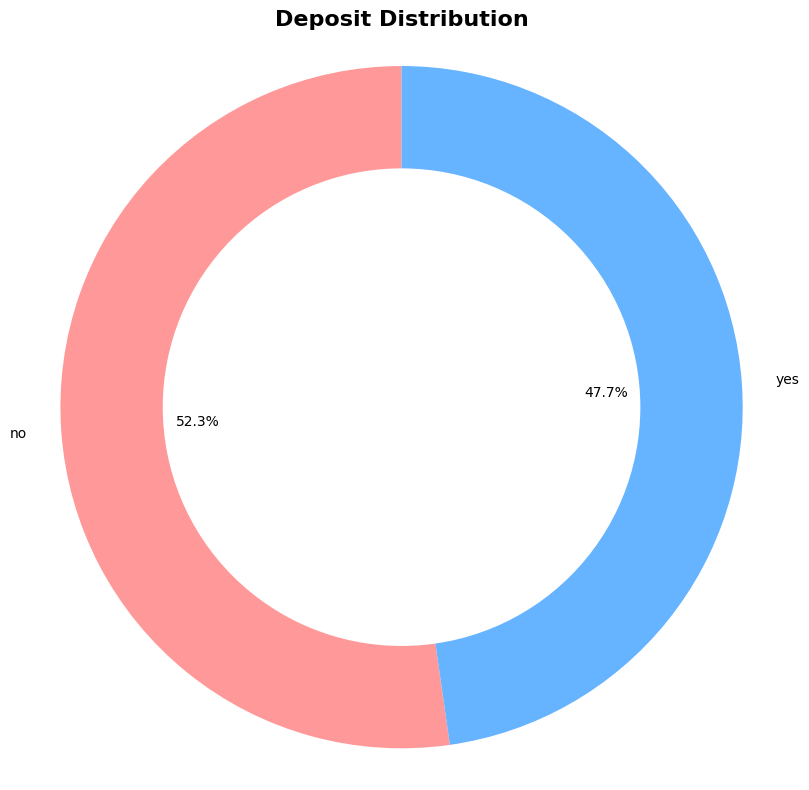

In [30]:
plt.figure(figsize=(8, 8))
plt.pie(deposit_counts, labels=deposit_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

# Draw a circle at the center of the pie chart to create a doughnut chart effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Deposit Distribution', fontsize=16, fontweight='bold')  # Add title with larger font size and bold
plt.axis('equal')  # Ensure equal aspect ratio for a circular pie chart
plt.tight_layout()
plt.show()

**Insight:**
- Data pengguna yang membuka rekening deposito memiliki persentase 47,7% 
- Data pengguna yang tidak membuka rekening memiliki persentase 52,3% 
- Target data bisa dikatakan balance karena persentase yang membuka deposito dan tidak hampir sama

In [31]:
# import dataset                                                                        
df = pd.read_csv('new_data.csv')
display(df.head(), df.tail())
df.shape

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,married,secondary,no,4,94,0
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,married,tertiary,no,17,882,0
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,married,secondary,no,7,476,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,single,primary,no,13,531,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,married,secondary,no,18,176,0


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
7813,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes,married,secondary,no,3,322,0
7814,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes,married,tertiary,no,24,127,2
7815,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no,married,secondary,no,8,14,0
7816,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no,married,secondary,no,21,226,0
7817,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes,married,primary,no,6,728,0


(7818, 17)

## **Feature Engineering**

In [32]:
# Import required libraries

from imblearn.over_sampling import *
from imblearn.under_sampling import *

from pycaret.classification import *
from pycaret.internal.preprocess.transformers import TransformerWrapper, FixImbalancer

from category_encoders import OneHotEncoder, BinaryEncoder, OrdinalEncoder
from typing import Literal

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.preprocessing import RobustScaler, StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector

from scipy.stats.mstats import winsorize

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")


In [33]:
RANDOM_SEED = 2020
K_FOLDS = 10

In [34]:
# import dataset                                                                        
df = pd.read_csv('new_data.csv')
display(df.head(), df.tail())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes,married,secondary,no,4,94,0
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes,married,tertiary,no,17,882,0
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes,married,secondary,no,7,476,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no,single,primary,no,13,531,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no,married,secondary,no,18,176,0


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
7813,62,housemaid,2,no,no,cellular,nov,1,-1,unknown,yes,married,secondary,no,3,322,0
7814,48,housemaid,5473,no,no,cellular,feb,2,184,success,yes,married,tertiary,no,24,127,2
7815,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no,married,secondary,no,8,14,0
7816,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,no,married,secondary,no,21,226,0
7817,60,retired,1588,no,no,cellular,oct,1,-1,unknown,yes,married,primary,no,6,728,0


### **Create Class for Handling Problems**

Penanganan masalah dalam dataset dilakukan dengan membuat sebuah kelas yang berisi semua fungsi penanganan, yang nantinya akan diintegrasikan ke dalam sebuah pipeline bersama dengan feature engineering dan digunakan dalam eksperimental setup.

Dalam kelas tersebut, terdapat fungsi untuk menangani masalah pada kolom numerik maupun kategorikal. Untuk kolom numerik, dilakukan penanganan outlier. Sementara itu, untuk kolom kategorikal, penanganan nilai yang tidak diketahui, kardinalitas, dan juga mengonversi nilai kategori ordinal menjadi angka dilakukan untuk persiapan tahap encoding

In [35]:
class Cleaning(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        # Handling Outliers pada Kolom Numerik
        # --------------------------------------
        # handling ouliers pada kolom balance
        X['balance'] = winsorize(X['balance'], limits=(0.05, 0.05))
        X['duration'] = winsorize(X['duration'], limits=(0.05, 0.05))
        X['previous'] = winsorize(X['previous'], limits=(0.05, 0.05))

        # handling outlier pada kolom pdays
        pdays_bins = [-2, -1, 90, 180, 270, 360, np.inf]
        pdays_labels = ['no prior contact', '0-3 months', '3-6 months', '6-9 months', '9-12 months', 'over a year']
        X['pdays'] = pd.cut(X['pdays'], bins=pdays_bins, labels=pdays_labels, right=False)

        # handling outlier pada kolom age
        age_bins = [0, 14, 24, 54, 64, np.inf]
        age_labels = ['children', 'early working age', 'prime working age', 'mature working age', 'elderly']
        X['age'] = pd.cut(X['age'], bins=age_bins, labels=age_labels, right=False)

        # handling outlier pada kolom campaign
        equal_freq = KBinsDiscretizer(n_bins = 5, encode = 'ordinal', strategy='quantile')
        equal_freq.set_output(transform='pandas')
        equal_freq.fit(X[['campaign']])
        # X['campaign'] = pd.qcut(X['campaign'], q=4, labels=['low frequency', 'medium frequency', 'high frequency', 'very high frequency'])

        # Handle Permasalahan pada Kolom Kategorik
        # ---------------------------------------

        # Menangani nilai unknown dan rare label
        X['job'].replace({"entrepreneur" : "self-employed",
                          "student": "unemployed",
                          "retired": "unemployed",   
                          "unknown" : "unemployed",
                          "housemaid": "services"},
                          inplace= True)
        
        # Mengubah nilai bulan
        X['month'].replace({"jan": 1,
                            "feb": 2,
                            "mar": 3,
                            "apr": 4,
                            "may": 5,
                            "jun": 6,
                            "jul": 7,
                            "aug": 8,
                            "sep": 9,
                            "oct": 10,
                            "nov": 11,
                            "dec": 12},inplace= True)
        
        # Mengubah nilai untuk ordinal encoding
        X['poutcome'].replace({'unknown': 0, 
                               'other': 1, 
                               'failure': 2, 
                               'success': 3}, inplace = True)
        
        # Mengubah nilai untuk ordinal encoding
        X['education'].replace({'unknown': 0, 
                               'primary': 1, 
                               'secondary': 2, 
                               'tertiary': 3}, inplace = True)

        return X.to_numpy()

Langkah awal dalam feature engineering adalah membagi data menjadi training set dan test set. Nilai "yes" atau "no" dalam variabel target akan diubah menjadi 0 dan 1 (encoding) untuk memudahkan proses pemodelan.

In [36]:
df['deposit'] = df['deposit'].apply(lambda x: 1 if x == 'yes' else 0)
df_train, df_test = train_test_split(df, stratify=df['deposit'], test_size=0.2, random_state=RANDOM_SEED)
df_train.shape, df_test.shape

((6254, 17), (1564, 17))

Selanjutnya, sebuah pipeline dibuat berdasarkan langkah-langkah preprocessing. Langkah pertama adalah menangani masalah dalam data, diikuti dengan penskalaan untuk fitur-fitur numerik, dan terakhir, pengkodean untuk fitur-fitur kategorikal.

In [37]:
# create pipeline

preprocessor = [
    ('cleaning', TransformerWrapper(include=['balance', 'duration', 'previous', 'pdays', 'age', 'campaign', 'job', 'month', 'poutcome', 'education'], transformer=Cleaning())), 
    ('scaling', TransformerWrapper(include=['balance', 'duration', 'previous'], transformer=RobustScaler())),
    ('onehot', TransformerWrapper(include=['job', 'contact', 'marital'], transformer=OneHotEncoder())),
    ('binary', TransformerWrapper(include=['housing', 'loan', 'default'], transformer=BinaryEncoder())),
    ('ordinal', TransformerWrapper(include=['month', 'poutcome', 'pdays', 'age', 'campaign', 'education'], transformer=OrdinalEncoder())) 
]

## **Modeling Experiment**

Sebelum melakukan eksperimen pemodelan, sebuah pengaturan eksperimen global dilakukan yang berguna untuk mempersiapkan lingkungan dan juga mempersiapkan data untuk pemodelan. Dalam pengaturan ini, kami menetapkan parameter-parameter yang ingin kami gunakan dalam melakukan eksperimen.

In [38]:
exp = setup(
    # Global config
    experiment_name='Deposit Classification',
    data=df_train, 
    target='deposit', 
    train_size=0.8,
    verbose=True,

    # Data preprocessing config
    preprocess=False,
    session_id=RANDOM_SEED, 
    custom_pipeline=preprocessor,
    custom_pipeline_position=-1,

    # Model selection config
    fold=K_FOLDS,
    fold_shuffle=False,
    fold_strategy='stratifiedkfold',
)

,Description,Value
0,Session id,2020
1,Target,deposit
2,Target type,Binary
3,Original data shape,"(6254, 17)"
4,Transformed data shape,"(6254, 30)"
5,Transformed train set shape,"(5003, 30)"
6,Transformed test set shape,"(1251, 30)"
7,Numeric features,7
8,Categorical features,9


In [39]:
# Show the pipeline
get_config('pipeline')

Pipeline(memory=FastMemory(location=C:\Users\LENOVO\AppData\Local\Temp\joblib),
         steps=[('cleaning',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['balance',
                                                                            'duration',
                                                                            'previous',
                                                                            'pdays',
                                                                            'age',
                                                                            'campaign',
                                                                            'job',
                                                                            'month',
                                                                            'poutcome',
                                                                            'education'],
                                                                   transformer=Cleaning()))),
                ('scaling',
                 TransformerWrapper(exc...
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': 4.0      1
2.0      2
6.0      3
5.0      4
1.0      5
3.0      6
9.0      7
12.0     8
8.0      9
10.0    10
7.0     11
28.0    12
16.0    13
26.0    14
11.0    15
13.0    16
23.0    17
30.0    18
24.0    19
17.0    20
19.0    21
15.0    22
22.0    23
18.0    24
14.0    25
21.0    26
25.0    27
29.0    28
20.0    29
43.0    30
63.0    31
NaN     -2
dtype: int64},
                                                                                                       {'col': 'education',
                                                                                                        'data_type': dtype('O'),
                                                                                                        'mapping': 2.0    1
1.0    2
3.0    3
0.0    4
NaN   -2
dtype: int64}],
                                                                                              return_df=True,
                                                                                              verbose=0))))],
         verbose=False)

### **Benchmark Model**

Tahap pemodelan pertama adalah mencari model benchmark untuk digunakan sebagai dasar kinerja untuk pemodelan pada tahap selanjutnya. Membandingkan model regresi atau klasifikasi untuk mendapatkan benchmark model antara Light Gradient Boosting Machine (lightgbm), Gradient Boosting Classifier (gbc), Random Forest Classifier (rf), Logistic Regression (lr), Decision Tree Classifier (dt), K Neighbors Classifier (kn)

In [40]:
best_model = compare_models(include=['lr', 'gbc', 'lightgbm', 'dt', 'rf', 'knn'], sort= 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8503,0.9185,0.8723,0.8245,0.8476,0.7007,0.7019,0.2540
gbc,Gradient Boosting Classifier,0.8387,0.9116,0.8518,0.8180,0.8344,0.6773,0.6781,0.7120
rf,Random Forest Classifier,0.8337,0.9058,0.8509,0.8103,0.8300,0.6674,0.6684,0.2160
lr,Logistic Regression,0.8019,0.8802,0.7714,0.8063,0.7879,0.6023,0.6035,0.9570
dt,Decision Tree Classifier,0.7601,0.7596,0.7487,0.7491,0.7487,0.5193,0.5196,0.0660
knn,K Neighbors Classifier,0.7543,0.8238,0.6624,0.7894,0.7199,0.5042,0.5107,0.0940


- Dikarenakan akan membuat model yang dapat mengurangi cost kampanye dari bank, tetapi tanpa membuat menjadi kurangnya kandidat nasabah potensial yang dicari oleh bank, jadi kita ingin sebanyak mungkin prediksi kelas positif yang benar, dengan sesedikit mungkin prediksi false positive. Sehingga yang akan kita gunakan adalah F1 Score.
- Dengan mempertimbangkan nilai `f1-score` akan mengambil 3 model yang menunjukan nilai paling besar yaitu, Light Gradient Boosting Machine **(lightgbm)**, Gradient Boosting Classifier **(gbc)**, Random Forest Classifier **(rf)**
- Selanjutnya akan melakukan cross validasi dan tuning hyperparameters dari ketiga model tersebut

#### **Light Gradient Boosting Machine Model**

In [41]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True )

**Insight**:
* Setelah dilakukan cross validation nilai `f1-score` yang dihasilkan pada percobaan data train adalah **0.9363** dan untuk percobaan pada data test adalah **0.8476**

In [42]:
evallgbm = evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Selanjutnya, akan mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [43]:
lightgbm = create_model('lightgbm', cross_validation=True, return_train_score=True, probability_threshold = 0.38)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:19:40
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


**Insight**:
* Setelah mempertimbangkan probability threshold  nilai `f1-score` yang dihasilkan pada percobaan data train turun dari **0.9363** menjadi **0.9245** dan untuk percobaan pada data test naik dari yang sebelumnya **0.8476** menjadi **0.8531**

Dikarenakan model dirasa masih overfitting, maka akan dilakukan tunning hyperparameters dengan memperhatikan :

- `num_leaves` : Parameter ini menentukan jumlah maksimum daun (leaf) dalam setiap pohon dalam ensemble. 
- `max_depth` : Ini adalah kedalaman maksimum dari setiap pohon dalam ensemble.
- `learning_rate` : Ini adalah seberapa besar kontribusi setiap model (pohon) dalam setiap iterasi. 
- `n_estimators` : Parameter ini menentukan jumlah pohon dalam ensemble. 
- `reg_alpha` : Ini adalah parameter regulasi tipe L1 (Lasso). Regulasi digunakan untuk mencegah overfitting dengan menambahkan penalti pada koefisien model. 
- `reg_lamda` : Ini adalah parameter regulasi tipe L2 (Ridge). Seperti reg_alpha, regulasi ini bertujuan untuk mengontrol kompleksitas model. Ketika lebih tinggi akan memperkuat regulasi L2 dan mengurangi risiko overfitting.

In [44]:
param_grid = {
    'num_leaves': [20, 30, 31],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [ 0.1, 1, 10, 100, 1000],
    'reg_lambda': [0.1, 1, 10, 100, 1000],
}

tuned_lgbm = tune_model(
    estimator=lightgbm, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:19:44
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Insight**:
* Setelah dilakukan tunning hyperparameters terjadi penurunan nilai `f1-score` pada data train yang tadinya **0.9245** menjadi **0.8740** namun terjadi penurunan nilai pada data test yang tadinya **0.8531** menjadi **0.8515** 

#### **Gradient Boosting Model**

In [45]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True)

**Insight** :
* Setelah dilakukan cross validation nilai `f1-score` yang dihasilkan pada percobaan data train adalah **0.8551** dan untuk percobaan pada data test adalah **0.8344**

In [46]:
evalGbc = evaluate_model(gbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Selanjutnya, akan mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [47]:
gbc = create_model('gbc', cross_validation=True, return_train_score=True, probability_threshold = 0.43)

**Insight** :
- Setelah mempertingkan probability threshold nilai `f1-score` yang dihasilkan pada percobaan data train naik dari **0.8551** menjadi **0.8613** dan untuk percobaan pada data test naik dari **0.8344** menjadi **0.8425**

Untuk meningkatkan nilai `f1-score`, akan dicoba melakukan tuning hyperparameters dengan mempertibangkan :

- `max_depth` : Ini adalah kedalaman maksimum dari setiap pohon dalam ensemble.
- `learning_rate` : Ini adalah seberapa besar kontribusi setiap model (pohon) dalam setiap iterasi. 
- `n_estimators` : Parameter ini menentukan jumlah pohon dalam ensemble. 
- `max_features` : Parameter ini mengontrol jumlah fitur yang dipertimbangkan saat mencari split terbaik di setiap node dari pohon keputusan.

In [48]:
param_grid = {
    'max_depth': [ 1, 5],
    'learning_rate': [0.05, 0.1, 0.2, 0.5, 1, 2],
    'n_estimators': [50, 100, 200],
    'max_features' : [10, 15, 20, 25, 28]
}

tuned_gbc = tune_model(
    estimator=gbc, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:20:32
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Insight**:
- Setelah dilakukan tunning hyperparameters terjadi kenaikan nilai `f1-score` pada data train yang tadinya **0.8613** menjadi **0.8765** dan penurunan nilai pada data test yang tadinya **0.8425** menjadi **0.8420**

#### **Random Forest Model**

In [49]:
rf = create_model('rf', cross_validation=True, return_train_score=True)

**Insight** :
- Setelah dilakukan cross validation nilai `f1-score` yang dihasilkan pada percobaan data train adalah **1.0000** dan untuk percobaan pada data test adalah **0.8300**

In [50]:
evalrf = evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Selanjutnya, akan mencoba optimalisasi model dengan mempertimbangkan probability threshold

In [51]:
rf = create_model('rf', cross_validation=True, return_train_score=True, probability_threshold = 0.40)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:20:58
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


**Insight** :
- Setelah mempertimbangkan probability threshild nilai `f1-score` yang dihasilkan pada percobaan data train menurun dari **1.0000** menjadi **0.9984** dan untuk percobaan pada data test meningkat dari **0.8300** menjadi **0.8384**

Untuk mengatasi overfitting akan dilakukan tuning hyperparameters dengan mempertimbangkan :

- `max_depth` : Ini adalah kedalaman maksimum dari setiap pohon dalam ensemble.
- `learning_rate` : Ini adalah seberapa besar kontribusi setiap model (pohon) dalam setiap iterasi. 
- `n_estimators` : Parameter ini menentukan jumlah pohon dalam ensemble. 
- `max_features` : Parameter ini mengontrol jumlah fitur yang dipertimbangkan saat mencari split terbaik di setiap node dari pohon keputusan.

In [52]:
# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [50, 100, 150],
    'min_samples_leaf': [20, 40, 60, 80, 100],
    'max_features': [10, 15, 20, 25, 28]
}

tuned_rf = tune_model(
    estimator=rf, 
    optimize='F1', 
    n_iter=10, 
    custom_grid=param_grid, 
    search_library='scikit-learn',
    search_algorithm='random',
    return_train_score=True
)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:21:05
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Insight**:
* Setelah dilakukan tunning hyperparameters terjadi penurunan nilai `f1-score` pada data train yang tadinya **0.9984** menjadi **0.8504** dan juga penurunan pada nilai data test yang sebelumnya **0.8384** menjadi **0.8355**

Setelah melakukan kuantifikasi pada model dan melakukan tuning hyperparameters, langkah selanjutnya kita akan memilih 1 model terbaik yang nantinya akan dipakai dan diimplementasikan pada analisis

In [53]:
compare_models(include=[tuned_lgbm, tuned_gbc, tuned_rf])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:21:41
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,CustomProbabilityThresholdClassifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.8501,0.9185,0.9121,0.8015,0.8531,0.7013,0.7076,0.2550
1,Gradient Boosting Classifier,0.8411,0.9116,0.8899,0.8000,0.8425,0.6831,0.6871,0.2110
2,Random Forest Classifier,0.8313,0.9058,0.9167,0.7726,0.8384,0.6646,0.6754,0.2100


CustomProbabilityThresholdClassifier(boosting_type='gbdt', class_weight=None,
                                     classifier=LGBMClassifier(boosting_type='gbdt',
                                                               class_weight=None,
                                                               colsample_bytree=1.0,
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                                                               min_child_samples=20,
                                                               min_child_weight=0.001,
                                                               min_split_gain=0.0,
                                                               n_estimators=100,
                                                               n_jobs=-1,
                                                               num_leaves=31,
                                                               objective=None,
                                                               random_state=2...
                                                               subsample_for_bin=200000,
                                                               subsample_freq=0),
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, probability_threshold=0.38,
                                     random_state=2020, reg_alpha=0.0,
                                     reg_lambda=0.0, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0)

Setelah melalui kuantifikasi dan tunning hyperparameters, maka kita akan mendapatkan bahwa model **Light Gradient Boosting Machine (lightgbm)** memiliki nilai `f1-score` yang lebih tinggi dibandingkan model yang lain. Sehingga, kita menetapkan akan menggunakan model tersebut

#### **Model Evaluation**

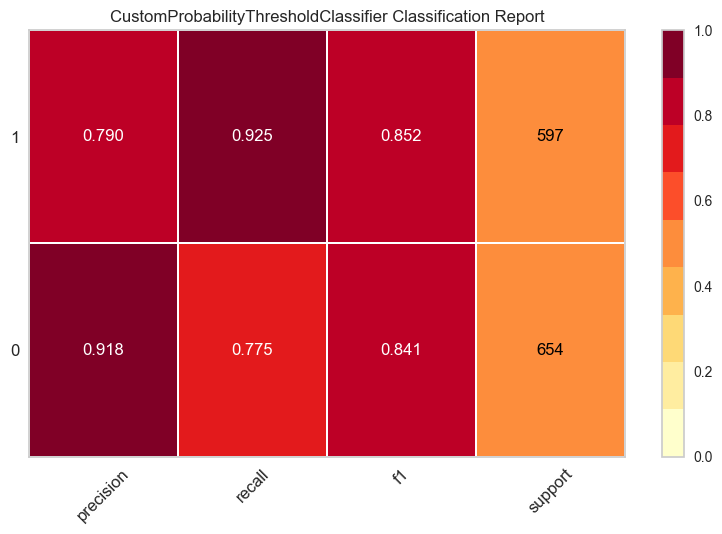

In [54]:
plot_model(tuned_lgbm, plot= 'class_report')

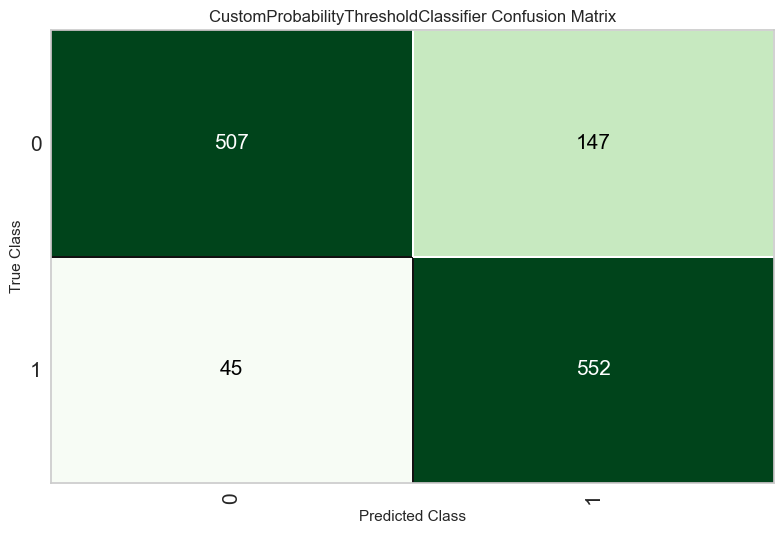

In [55]:
plot_model(tuned_lgbm, plot= 'confusion_matrix')

**Insight** : 
* `f1-score` merupakan rerata harmonic dari recall dan precision
* `f1-score` pada **kelas negatif** menghasilkan nilai sebesar 0.841 
* `f1-score` pada **kelas positif** menghasilkan nilai sebesar 0.852
* Pada **kelas positif**, recall menghasilkan nilai 0.925 dan precision menghasilkan nilai 0.790 yang artinya dari keseluruhan observasi positif sebanyak 597 pengguna, sebanyak 92,5% pengguna akan terprediksi benar-benar membuka rekening deposito **(teprediksi true positif)** atau sejumlah 552 pengguna, dan dari semua pengguna yang terprediksi membuka rekening deposito **(teprediksi true positif + false positif)** yaitu sebesar 699 orang secara aktual terdapat 79% pengguna yang akan benar-benar membuka rekening deposito atau sejumlah 552 pengguna. 
* Pada **kelas negatif**, recall menghasilkan nilai 0.775 dan precision menghasilkan nilai 0.918 yang artinya dari keseluruhan observasi negatif sebanyak 654 pengguna, sebanyak 77,5% pengguna akan terprediksi benar-benar tidak membuka rekening deposito **(teprediksi true negatif)** atau sejumlah 507 pengguna, dan dari semua pengguna yang terprediksi tidak membuka rekening deposito **(teprediksi true negatif + false negatif)** yaitu sebesar 552 orang secara aktual terdapat 92% pengguna yang tidak akan membuka rekening deposito atau sejumlah 507 pengguna.

In [56]:
finalizeModels = finalize_model(tuned_lgbm)

#### **Model Explanation**

##### **SHAP (Shapley Additive Explanations)**

SHAP (Shapley Additive Explanations) adalah metode interpretasi machine learning yang digunakan untuk menjelaskan prediksi individu dari model dengan memperhitungkan kontribusi setiap fitur terhadap prediksi tersebut. Konteks interpretasi model prediktif, fungsi SHAP memberikan cara untuk mengukur kontribusi setiap fitur terhadap prediksi model terhadap suatu data

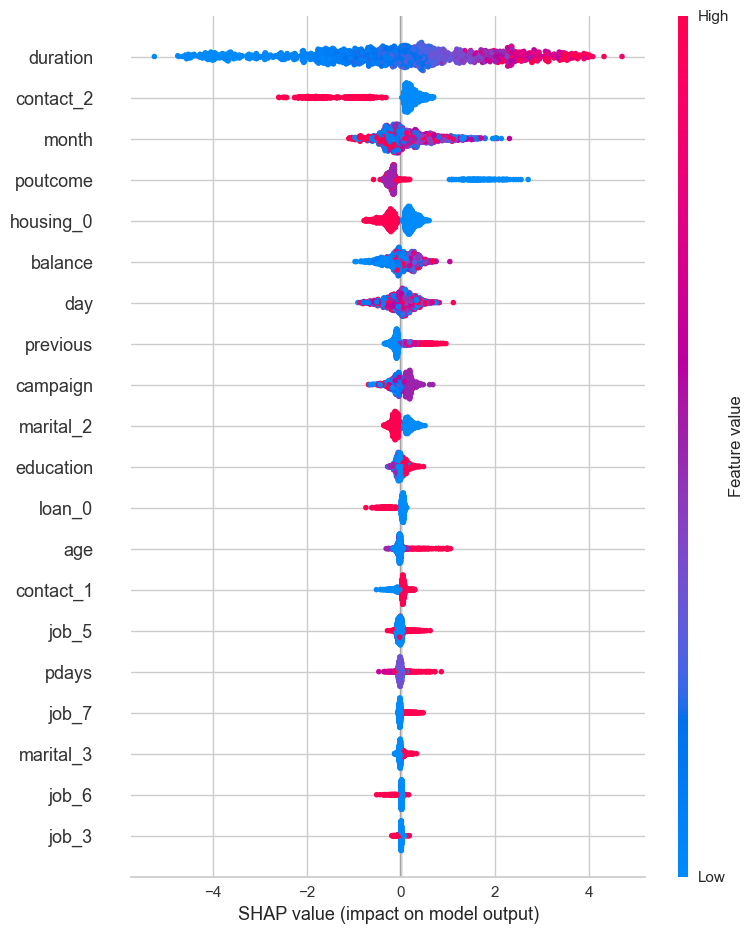

In [57]:
interpret_model(tuned_lgbm, plot = 'summary')

**Insight** : 
- Kita mendapatkan bahwa fitur paling **importance** dalam membangun model machine learning ini adalah **duration**
- Pada fitur **duration** juga menampilkan bahwa semakin lama durasi bank menghubungi nasabah, akan banyak mempengaruhi nasabah untuk terprediksi membuka rekening deposito.
- Pada fitur **contact** menunjukkan bahwa nasabah yang dihubungi dengan phone/telepon cenderung lebih berpengaruh untuk teprediksi membuka rekening deposito
- Fitur paling **importance** selanjutnya yaitu **month**, di mana nasabah yang dihubungi pada bulan-bulan di akhir tahun dan awal tahun juga akan banyak mempengaruhi nasabah untuk teprediksi membuka rekening deposito, namun kebanyakan nasabah jika ditinjau dari fitur month akan cenderung terprediksi tidak membuka rekening deposito
- Pada fitur **poutcome** menginterpretasikan bahwa nasabah yang pada campaign sebelumnya berhasil untuk didapatkan oleh bank juga cenderung lebih berpotensi untuk terprediksi membuka rekening deposito 
- Pada fitur **housing** orang yang tidak memiliki kredit perumahan lebih cenderung lebih berpotensi untuk terprediksi membuka rekening deposito
- Dari lima fitur dengan kontribusi terbesar, yang paling berpengaruh untuk klasifikasi adalah fitur yang terkait dengan kampanye. Hal ini menunjukkan bahwa upaya marketing sangat berperan dalam meningkatkan jumlah pengguna yang berinvestasi dalam deposito berjangka.

#### **Model Limitation**


In [58]:
df['job'].unique()

array(['admin.', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', 'unknown'], dtype=object)

**Insight** : 

Model hanya dapat memprediksi nasabah-nasabah dengan job admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown. Sementara untuk pekerjaan yang tidak terdapat pada kolom bisa di masukkan pada unknown. Namun membuat data tersebut bisa menjadi bias karena sebenarnya tidak tersedia pada kolom pada saat pembuatan machine learning

In [59]:
df['age'].unique()

array([55, 39, 51, 38, 36, 41, 37, 35, 57, 23, 33, 31, 53, 30, 46, 48, 25,
       29, 28, 52, 49, 44, 42, 27, 47, 64, 26, 34, 56, 32, 58, 45, 54, 50,
       79, 65, 40, 24, 60, 43, 61, 59, 62, 68, 82, 71, 73, 76, 69, 20, 72,
       22, 67, 19, 70, 75, 63, 93, 77, 80, 66, 21, 87, 81, 92, 88, 84, 83,
       78, 74, 18, 85, 95, 86, 90], dtype=int64)

**Insight** : 

Pada kolom age nantinya akan dibinning menjadi 4 kategori, sehingga model akan berkerja maksimal jika nasabah yang akan di masukkan pada data test berumur diantara 18-95 tahun

In [60]:
df.contact.unique()

array(['cellular', 'telephone', 'unknown'], dtype=object)

**Insight**:

Pada saat pembuatan model, contact yang tersedia hanya cellular, telephone, dan unknown. Sehingga ketika nantinya data yang akan dimasukkan tidak dapat didefinisikan, maka bisa dimasukkan sebagai unknown, walaupun nantinya data akan menjadi bias

In [61]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

**Insight** :

Pada saat pembuatan model, status pernikahan yang bisa untuk diidentifikasi adalah married, single, dan divorced. Sehingga untuk kategori status pernikahan yang lain belum bisa maksimal untuk bekerja pada machine learning

In [62]:
df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

**Insight** :

Limitasi pada kolom education pada saat pembuatan model hanya bisa mengidentifikasi level pendidikan secondary, tertiary, primary, dan unknown. Untuk level pendidikan yang belum teridentifikasi bisa dimasukkan pada unknown namun besar kemungkinan model tidak bisa bekerja secara maksimal karena data tersebut bias.

In [63]:
df_test

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,marital,education,default,day,duration,previous
5593,45,blue-collar,2071,no,yes,telephone,jul,2,-1,unknown,0,married,secondary,no,22,1148,0
179,38,technician,318,no,no,cellular,aug,1,182,success,1,married,secondary,no,5,274,6
833,34,admin.,899,yes,no,unknown,nov,1,170,failure,1,married,tertiary,no,12,114,3
7803,34,unemployed,978,no,no,cellular,jun,2,71,success,1,married,secondary,no,3,262,1
1265,73,retired,508,no,no,cellular,mar,1,-1,unknown,1,married,primary,no,9,176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,34,blue-collar,479,no,no,cellular,jul,1,-1,unknown,0,married,primary,no,11,772,0
2118,30,management,1239,no,no,cellular,aug,5,-1,unknown,0,married,tertiary,no,28,125,0
7367,35,blue-collar,1177,no,no,cellular,jun,4,-1,unknown,1,married,primary,no,8,243,0
5221,45,management,3150,yes,no,cellular,nov,2,-1,unknown,0,divorced,tertiary,no,17,101,0


#### **`Simulation`**

In [64]:
deposit = df_test['deposit']

In [65]:
df_test.drop(columns=['deposit'], inplace=True)
df_test['deposit'] = deposit
df_test

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,deposit
5593,45,blue-collar,2071,no,yes,telephone,jul,2,-1,unknown,married,secondary,no,22,1148,0,0
179,38,technician,318,no,no,cellular,aug,1,182,success,married,secondary,no,5,274,6,1
833,34,admin.,899,yes,no,unknown,nov,1,170,failure,married,tertiary,no,12,114,3,1
7803,34,unemployed,978,no,no,cellular,jun,2,71,success,married,secondary,no,3,262,1,1
1265,73,retired,508,no,no,cellular,mar,1,-1,unknown,married,primary,no,9,176,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,34,blue-collar,479,no,no,cellular,jul,1,-1,unknown,married,primary,no,11,772,0,0
2118,30,management,1239,no,no,cellular,aug,5,-1,unknown,married,tertiary,no,28,125,0,0
7367,35,blue-collar,1177,no,no,cellular,jun,4,-1,unknown,married,primary,no,8,243,0,1
5221,45,management,3150,yes,no,cellular,nov,2,-1,unknown,divorced,tertiary,no,17,101,0,0


In [66]:
# prediksi model pada data test
y_pred = finalizeModels.predict(X=df_test.iloc[ : , :-1])

# membuat kolom baru untuk menambahkan prediksi
df_test['y_pred'] = y_pred

# membagi data pada true positif, false positif, true negatif, dan false negatif
true_positif = df_test.query("(deposit == 1 & y_pred == 1)")
false_positif = df_test.query("(deposit == 0 & y_pred == 1)")
true_negatif = df_test.query("(deposit == 0 & y_pred == 0)")
false_negatif = df_test.query("(deposit == 1 & y_pred == 0)")

In [67]:
# memunculkan nilai metrics
testPredict = predict_model(finalizeModels, data= df_test)
testPredict

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8657,0.9338,0.9143,0.8239,0.8668,0.7322,0.7362


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,marital,education,default,day,duration,previous,y_pred,deposit,prediction_label,prediction_score
5593,45,blue-collar,2071,no,yes,telephone,jul,2,-1,unknown,married,secondary,no,22,1148,0,1,0,1,0.9041
179,38,technician,318,no,no,cellular,aug,1,182,success,married,secondary,no,5,274,6,1,1,1,0.9638
833,34,admin.,899,yes,no,unknown,nov,1,170,failure,married,tertiary,no,12,114,3,1,1,1,0.4618
7803,34,unemployed,978,no,no,cellular,jun,2,71,success,married,secondary,no,3,262,1,1,1,1,0.9650
1265,73,retired,508,no,no,cellular,mar,1,-1,unknown,married,primary,no,9,176,0,1,1,1,0.9551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7154,34,blue-collar,479,no,no,cellular,jul,1,-1,unknown,married,primary,no,11,772,0,1,0,1,0.8874
2118,30,management,1239,no,no,cellular,aug,5,-1,unknown,married,tertiary,no,28,125,0,0,0,0,0.9190
7367,35,blue-collar,1177,no,no,cellular,jun,4,-1,unknown,married,primary,no,8,243,0,1,1,1,0.7296
5221,45,management,3150,yes,no,cellular,nov,2,-1,unknown,divorced,tertiary,no,17,101,0,0,0,0,0.9570


In [68]:
print(f"TP : {len(true_positif)}")
print(f"FP: {len(false_positif)}")
print(f"TN: {len(true_negatif)}")
print(f"FN: {len(false_negatif)}")
print(f"Total nasabah pada data test: {len(df_test)}")

TP : 683
FP: 146
TN: 671
FN: 64
Total nasabah pada data test: 1564


| Columns                                            | Definition                                                   | 
| ------------------------------------------------- | ------------------------------------------------------------ |
| `TP` | 683 |
| `FP` | 146 | 
| `TN` | 671 |
| `FN` | 64 | 


---------------------
Kami akan melakukan simulasi untuk mendapatkan gambaran tentang konsekuensi dari setiap jenis kesalahan menggunakan data dengan informasi berikut: 
- Berdasarkan dataset, total jumlah pelanggan yang dihubungi adalah 7805, di mana 4075 tidak membuka rekening deposito jangka panjang dan 3730 membuka rekening deposito jangka panjang.
- Menurut [callcenterhelper.com](https://www.callcentrehelper.com/how-do-i-calculate-cost-per-call-113990.htm), biaya rata-rata per panggilan adalah EUR 3.64
- Menurut [Brian William, PhD](https://blog.thebrevetgroup.com/21-mind-blowing-sales-stats), rata-rata jumlah upaya panggilan untuk mencapai prospek adalah 8 kali.
- Pada tahun 2014 ketika data dihasilkan, [tingkat bunga deposito di Portugal](https://tradingeconomics.com/portugal/interest-rate) adalah 0.25% sementara [tingkat bunga pinjaman](https://tradingeconomics.com/portugal/bank-lending-rate) pada saat yang sama sekitar 5.59%.
- Jumlah minimum pembukaan rekening deposito menurut [withportugal.com](https://withportugal.com/en/immigration/depositos-portugal) adalah EUR 100 dan maksimumnya adalah EUR 250,000.
- Rata-rata tahunan [gaji di Portugal](https://www.statista.com/statistics/419498/average-annual-wages-portugal-y-on-y/) pada tahun 2014 adalah EUR 18,806. Rata-rata [biaya hidup tahunan](https://www.numbeo.com/cost-of-living/historical-data?itemId=105&city_id=6029&name_city_id=Lisbon%2C+Portugal) hidup di Portugal pada tahun 2014 adalah EUR 10,422.24 (tidak termasuk biaya pendidikan, dll.), meninggalkan saldo EUR 8,384. Jika dihitung menggunakan asumsi investasi [moderat konservatif](https://www.investopedia.com/managing-wealth/achieve-optimal-asset-allocation/) di mana alokasi untuk investasi pendapatan tetap (deposito) adalah 55% - 60%, maka setiap klien berinvestasi setidaknya 0.55 x EUR 8,384 = EUR 4611.2 (≈ EUR 4611).

-----------------------------------------------------
- **`Simulasi Error Tipe 1`**
-----------------------------------------------------
Simulasi ini dilakukan untuk memberikan gambaran tentang kerugian anggaran pemasaran yang disebabkan oleh kesalahan tipe 1. Data yang digunakan adalah biaya rata-rata yang dikeluarkan dalam satu panggilan, yaitu EUR 4.15.

Dengan menggunakan panggilan pemasaran rata-rata untuk setiap pelanggan yang adalah 8 kali, biaya yang harus dikeluarkan untuk menghubungi setiap pelanggan dalam satu tahun adalah:

**Biaya panggilan untuk setiap orang**= EUR 4.15 * 8
                            = EUR 33.2

Dengan perhitungan ini, bank mengeluarkan biaya panggilan rata-rata sebesar EUR 33.2 per pelanggan per tahun

**Note**:
Perlu dicatat bahwa biaya rata-rata per panggilan yang digunakan mungkin lebih tinggi atau lebih rendah dari yang sebenarnya. Perhitungan di atas hanyalah perkiraan kasar tanpa mempertimbangkan komponen biaya lainnya

------------------------------------
- **`Simulasi Error Tipe 2`**
-----------------------
Simulasi ini akan menggambarkan konsekuensi dalam hal keuntungan dalam kasus kesalahan tipe 2. Dana yang diperoleh dari deposito jangka panjang dapat dipinjam oleh bank sehingga bank dapat mengambil manfaat dari bunga pinjaman. Berikut adalah perhitungan keuntungan per pelanggan menggunakan jumlah pembukaan deposit minimum EUR 4611.

**keuntungan per pelanggan** = (bunga pinjaman - bunga deposito) x jumlah deposit
                        = (5.59% - 0.25%) x 4611
                        = EUR 257 per year

----------------

**Perbandingan Biaya Marketing Dengan dan Tanpa Model**

--------------------
Tanpa model, bank menghubungi semua pelanggan, menghasilkan 1564 x EUR 33.2 = **EUR 51,924.8**. 
Sementara itu, ada 817 pelanggan yang faktual tidak ingin membuka rekening deposito. Oleh karena itu, biaya pemasaran yang terbuang adalah 817 x EUR 33.2 = **EUR 27124.4**.

Jika menggunakan model, bank hanya menghubungi orang-orang yang diprediksi akan membuka deposito. Berikut adalah perhitungannya:

| Deskripsi      | Pengguna| $Value      | Total|
|-----------------|------------|----------------|----------------|
| True Positive + False Positive| 829 | EUR 33.2 | EUR 27522.8 |
| False Positive  | 146 | EUR 33.2 |EUR 4847.2|

Dari sini dapat dilihat bahwa penggunaan model biaya pemasaran jauh lebih kecil dibandingkan dengan biaya yang harus ditanggung bank sebelumnya. Penghematan biaya pemasaran yang dapat dilakukan bank adalah:

**Marketing Savings** = ((initial_cost_marketing - final_cost_marketing) / initial_cost_marketing) * 100 = **47%**

Sementara itu, kerugian yang dapat dikurangi dengan menggunakan model adalah

**Loss Reduction** = ((initial_loss - final_loss) / initial_loss) * 100  = **82.1%**

--------------------

**Perbandingan Keuntungan dari Deposito Dengan dan Tanpa Model**

---------------------

Kita akan menghitung keuntungan bank dari deposito ketika tidak menggunakan model.

**Profit** = Profit from depositing customers - Marketing cost = (683 x EUR 257) - EUR 51924.8 = **EUR 123606.2**

Jika tanpa model bank menghubungi semua orang, maka dengan model bank hanya menghubungi orang yang diprediksi positif. Jika terjadi false negative, kerugian potensial bagi bank adalah
**loss due to false negatives** = total FN x potential profit  = 64 x EUR 257 = EUR 16448

Dengan demikian kita dapat menghitung keuntungan bank ketika menggunakan model berikut:

**Profit** = Profit from depositing customers - Marketing costs - loss due to false negatives  = (683 x EUR 257) - EUR 27522.8 - EUR 16448 = **EUR 131560.2**

Kenaikan keuntungan dari sebelum menggunakan model adalah **6.44%.**

Dari sini kita bisa melihat bahwa penggunaan model dapat membantu bank untuk menghemat biaya pemasaran dan sumber daya lainnya dalam upaya kampanye sehingga mereka dapat fokus pada target potensial.

## **Conclusion & Recommendation**

### **Conclusion**

Pilihan Model:
- Model Light Gradient Boosting Machine dipilih sebagai model utama berdasarkan pertimbangan f1-score

Evaluasi Model:
- Model menunjukkan kemampuan yang baik dalam mengidentifikasi kasus positif.
- Performa model cenderung konsisten antara data uji dan data holdout, menunjukkan tingkat generalisasi yang baik dan model terbukti robust

Limitasi dan Rekomendasi Model:
- Rekomendasi untuk memperbaiki recall kelas 0 atau mengevaluasi strategi bisnis yang dapat mengatasi potensi kesalahan prediksi pada kasus negatif.

Keandalan Model:
Model telah dianggap cukup umum dan robust untuk menangani data baru atau data yang belum pernah dilihat sebelumnya.
Keseluruhan, model dapat diandalkan dalam konteks prediksi deposit berjangka pada dataset yang telah disediakan.

Pertimbangan Tambahan:
- Evaluasi tambahan perlu dipertimbangkan berdasarkan kebutuhan bisnis spesifik.
- Model dapat terus diperbaiki atau disesuaikan dengan perubahan karakteristik data atau kebijakan bisnis yang mungkin timbul di masa mendatang.

Feature Importance:
duration merupakan fitur yang paling berkontribusi dalam memprekdisikan model karena mencerminkan lama durasi bank menghubungi nasabah

Dengan demikian, model Light Gradient Boosting Machine yang telah disesuaikan parameter terbukti cukup baik untuk memenuhi kebutuhan dan tujuan prediksi deposit berjangka pada dataset yang telah diberikan. Namun, evaluasi terus-menerus dan penyesuaian model dapat menjadi langkah berkelanjutan untuk memastikan kinerja optimal seiring berjalannya waktu.

### **Recommendation**

Rekomendasi Untuk Bank:
- Bank dapat menggunakan model Machine Learning untuk mengidentifikasi nasabah yang memiliki potensi untuk menaruh deposit berjangka, tetapi belum pernah menerima penawaran dari bank. Dengan mengidentifikasi nasabah potensial ini, bank dapat menargetkan mereka dengan konten pemasaran yang lebih relevan dan meningkatkan peluang untuk menabung.
- Bank dapat menargetkan kampanye kepada nasabah yang memiliki saldo yang tinggi dan sudah lama tidak dihubungi atau diberikan kampanye
- Bank dapat menggunakan model Machine Learning untuk mengembangkan konten pemasaran yang dipersonalisasi untuk setiap nasabah, berdasarkan profil dan minat mereka. Konten yang dipersonalisasi lebih cenderung menarik perhatian nasabah dan mendorong mereka untuk mengambil tindakan.
- Bank dapat menggunakan model Machine Learning untuk mengukur efektivitas kampanye pemasaran, seperti jumlah nasabah yang mendaftar untuk deposit berjangka dan jumlah deposit yang berhasil ditarik. Dengan mengukur efektivitas kampanye, bank dapat memahami apa yang berhasil dan apa yang perlu ditingkatkan.

Rekomendasi Implementasi di Kehidupan Nyata:
Perbaikan dan saran untuk future use:
- Threshold Adjustment:
Eksplorasi penyesuaian ambang batas prediksi untuk mencapai keseimbangan antara precision dan recall berdasarkan kebijakan bisnis dan dampak relatif dari false positives dan false negatives.

- Model Ensemble:
Pertimbangkan untuk mengimplementasikan model ensemble, seperti gabungan Logistic Regression dengan Random Forest, untuk meningkatkan kinerja dan mengatasi kelemahan masing-masing model.

Perbaikan Kondisi Data:
- Feature Engineering:
Perhatikan potensi feature engineering yang lebih baik untuk mendapatkan wawasan tambahan dari data. Misalnya, transformasi fitur atau penggabungan fitur untuk menciptakan variabel baru yang dapat memberikan informasi lebih banyak.

- Penanganan Outliers:
Jika ditemukan outliers pada fitur numerik tertentu, pertimbangkan untuk menangani atau menghilangkan outliers tersebut.

Rekomendasi Umum:
- Pelibatan Pihak Bisnis: Melibatkan tim pemasaran dan tim bisnis dalam interpretasi hasil model serta mendapatkan masukan dan pengetahuan domain.
- Edukasi Stakeholder: Memberikan pemahaman kepada pemangku kepentingan mengenai kekuatan dan keterbatasan model, sehingga keputusan dapat diambil dengan pemahaman yang lebih baik.
- Monitoring: Implementasikan sistem pemantauan yang terus-menerus untuk mendeteksi perubahan dalam performa model atau data.

Dengan mengikuti rekomendasi ini, implementasi model dapat menjadi alat yang berharga dalam mendukung keputusan strategis dan operasional dalam kampanye pemasaran deposit berjangka.

## **Save Model**

In [69]:
import pickle

pickle.dump(finalizeModels, open('Bank_Marketing_Campaign.sav', 'wb'))
filename = 'Bank_Marketing_Campaign.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(memory=Memory(location=None),
         steps=[('cleaning',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=TransformerWrapper(exclude=None,
                                                                   include=['balance',
                                                                            'duration',
                                                                            'previous',
                                                                            'pdays',
                                                                            'age',
                                                                            'campaign',
                                                                            'job',
                                                                            'month',
                                                                            'poutcome',
                                                                            'education'],
                                                                   transformer=Cleaning()))),
                ('scaling',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=Transf...
                                                                                subsample_freq=0),
                                                      colsample_bytree=1.0,
                                                      importance_type='split',
                                                      learning_rate=0.1,
                                                      max_depth=-1,
                                                      min_child_samples=20,
                                                      min_child_weight=0.001,
                                                      min_split_gain=0.0,
                                                      n_estimators=100,
                                                      n_jobs=-1, num_leaves=31,
                                                      objective=None,
                                                      probability_threshold=0.38,
                                                      random_state=2020,
                                                      reg_alpha=0.0,
                                                      reg_lambda=0.0,
                                                      subsample=1.0,
                                                      subsample_for_bin=200000,
                                                      subsample_freq=0))],
         verbose=False)

### **Reference**
[1] Oppong, C., Atchulo, A. S., Akwaa-Sekyi, E. K., Grant, D., & Kpegba, S. A. (2023). Financial literacy, investment and personal financial management nexus: Empirical evidence on private sector employees. Cogent Business & Management, 10(2). https://doi.org/10.1080/23311975.2023.2229106

[2] Charles, Mr.A. and Kasilingam, Dr.R. (2013) ‘Does the investor’s age influence their investment behaviour?’, Paradigm, 17(1–2), pp. 11–24. doi:10.1177/0971890720130103. 

[3] Bhola, Sarang Shankar and Shah, Vrushali and Zanvar, Priyanka, A Study of Relationship between Occupation and Individual Investment (July 5, 2013). Sinhgad International Business Review Vol. V, Issue I, July 2011-January 2012, Available at SSRN: https://ssrn.com/abstract=2290192

[4] Geetha, N., &amp; Ramesh, M. (2012). A study on relevance of demographic factors in investment decisions. Perspectives of Innovations, Economics and Business, 14–27. https://doi.org/10.15208/pieb.2012.02 